<a href="https://colab.research.google.com/github/kolguri6/-Bike-Sharing-Demand-Prediction-EDA-Regression/blob/main/Bike_Sharing_Demand_Prediction_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Bike Sharing Demand Prediction



##### **Project Type**    - EDA/Regression
##### **Contribution**    - Individual
##### **Project by**  - Kolguri Pavani

# **Project Summary -**


Bike sharing demand prediction involves utilizing various machine learning techniques to forecast the usage of bikes in a given area over a specific period. This prediction is crucial for bike-sharing service providers to optimize their operations, such as managing bike inventory, scheduling maintenance, and ensuring availability for users. The process typically begins with collecting historical data on bike usage, including factors like time of day, day of the week, weather conditions, and any special events.

Feature engineering plays a significant role in preparing this data for analysis, extracting meaningful insights that can improve prediction accuracy. Various algorithms, such as linear regression, decision trees, random forests, and neural networks, are then applied to build predictive models. These models are trained on a subset of the data and evaluated using metrics like mean squared error or root mean squared error to assess their performance.

Additionally, techniques like cross-validation help ensure the robustness of the models by testing them on different subsets of the data. Once a satisfactory model is developed, it can be deployed to make real-time predictions, enabling bike-sharing companies to anticipate demand fluctuations and adjust their operations accordingly. Overall, bike sharing demand prediction combines data science, machine learning, and domain knowledge to optimize resource allocation and enhance the user experience in urban transportation systems.



# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

My goal is to develop a model that is highly accurate, with a low mean absolute error and a high R-squared value. The model should also be able to provide insights into the factors that most impact bike demand, helping the bike sharing company to make data-driven decisions about how to optimize their operations.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
#data visualization libraries(matplotlib,seaborn, plotly)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Datetime library for manipulating Date columns.
from datetime import datetime
import datetime as dt


# from sci-kit library scaling, transforming and labeling functions are brought
# which is used to change raw feature vectors into a representation that is more
# suitable for the downstream estimators.
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder


# Importing various machine learning models.
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

# Import different metrics from sci-kit libraries for model evaluation.
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss

# Importing warnings library. The warnings module handles warnings in Python.
import warnings
warnings.filterwarnings('ignore')


### Dataset Loading

Dataset link - https://drive.google.com/file/d/1dZ7p614gC_iwxHwcj-1N0Lc155AGMTJS/view

In [2]:
# Load Dataset
data = pd.read_csv('/content/SeoulBikeData.csv',encoding ='latin') #read the csv file
Bike_df = pd.DataFrame(data)#converts the file into dataframe format

### Dataset First View

In [3]:
# Dataset First Look
pd.set_option('display.max_columns',16)  #includes all column names
Bike_df.head() #displays 1st five rows

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
Bike_df.shape# displays the count of rows and columns

(8760, 14)

### Dataset Information

In [5]:
# Dataset Info
Bike_df.info()#displays the total count of non-null values and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [10]:
# Dataset Duplicate Value Count
Bike_df[Bike_df.duplicated()] #gives the duplicates of the dataframe

Empty DataFrame
Columns: [Date, Rented Bike Count, Hour, Temperature(°C), Humidity(%), Wind speed (m/s), Visibility (10m), Dew point temperature(°C), Solar Radiation (MJ/m2), Rainfall(mm), Snowfall (cm), Seasons, Holiday, Functioning Day]
Index: []

In [7]:
# Dataset Duplicate Value Count
total_number_of_duplicates = len(Bike_df[Bike_df.duplicated()])  #gives total number of duplicated values
print("total number of duplicates =",total_number_of_duplicates)
print("since there are no duplicates in DataFrame, the duplicates value is zero")

total number of duplicates = 0
since there are no duplicates in DataFrame, the duplicates value is zero


#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
print(Bike_df.isnull().sum()) #gives total count of null values in each column

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64


<Axes: >

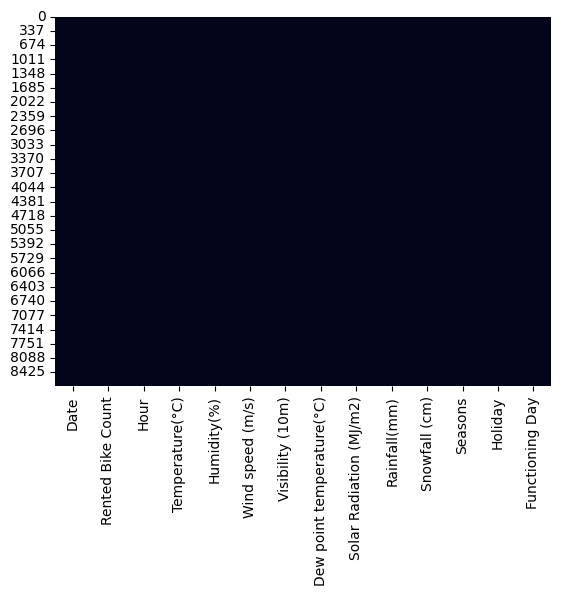

In [9]:
# Visualizing the missing values
sns.heatmap(Bike_df.isnull(), cbar = False) #vizualization of null values

### What did you know about your dataset?

There are 8760 observation and 14 features.
In a day we have 24 hours and we have 365 days a year so 365 multiplied by 24 = 8760, which represents the number of line in the dataset
There are no null values.
Dataset has all unique values i.e., there is no duplicate, which means data is free from bias as duplicates which can cause problems in downstream analysis, such as biasing results or making it difficult to accurately summarize the data.
Date has some object data types, it should be datetime data type.

## ***2. Understanding Your Variables***

In [11]:
# Dataset Columns
Bike_df.columns #gives the list of column names

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [12]:
# Dataset Describe
Bike_df.describe() # gives the statistical values of numerical values and unique values of categorical data

Rented Bike Count         Hour  Temperature(°C)  Humidity(%)  \
count        8760.000000  8760.000000      8760.000000  8760.000000   
mean          704.602055    11.500000        12.882922    58.226256   
std           644.997468     6.922582        11.944825    20.362413   
min             0.000000     0.000000       -17.800000     0.000000   
25%           191.000000     5.750000         3.500000    42.000000   
50%           504.500000    11.500000        13.700000    57.000000   
75%          1065.250000    17.250000        22.500000    74.000000   
max          3556.000000    23.000000        39.400000    98.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
count       8760.000000       8760.000000                8760.000000   
mean           1.724909       1436.825799                   4.073813   
std            1.036300        608.298712                  13.060369   
min            0.000000         27.000000                 -30.600000   
25%            0.900000        940.000000                  -4.700000   
50%            1.500000       1698.000000                   5.100000   
75%            2.300000       2000.000000                  14.800000   
max            7.400000       2000.000000                  27.200000   

       Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  
count              8760.000000   8760.000000    8760.000000  
mean                  0.569111      0.148687       0.075068  
std                   0.868746      1.128193       0.436746  
min                   0.000000      0.000000       0.000000  
25%                   0.000000      0.000000       0.000000  
50%                   0.010000      0.000000       0.000000  
75%                   0.930000      0.000000       0.000000  
max                   3.520000     35.000000       8.800000

### Variables Description

* **Date**: The date of the observation.

* **Rented Bike Count**: The number of bikes rented at the given date and time.

* **Hour**: The hour of the day when the observation was recorded.

* **Temperature(°C)**: The temperature in degrees Celsius at the time of observation.

* **Humidity(%)**: The relative humidity percentage at the time of observation.

* **Wind speed (m/s)**: The wind speed in meters per second at the time of observation.

* **Visibility (10m)**: The visibility in meters at the time of observation.

* **Dew point temperature(°C)**: The dew point temperature in degrees Celsius at the time of observation.

* **Solar Radiation (MJ/m2)**: The solar radiation in megajoules per square meter at the time of observation.

* **Rainfall(mm)**: The amount of rainfall in millimeters at the time of observation.

* **Snowfall (cm)**: The amount of snowfall in centimeters at the time of observation.

* **Seasons**: The season of the year (e.g., spring, summer, fall, winter).

* **Holiday**: Indicates whether the day is a holiday or not.

* **Functioning Day**: Indicates whether the bike-sharing system was functioning normally on the day of observation.

### Check Unique Values for each variable.

In [13]:
# Check Unique Values for each variable.
Bike_df.nunique()  # gives unique value in each column

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

In [14]:
# Check Unique Values for each variable.
print(Bike_df.apply(lambda col: col.unique())) # gives a list of unique value in each column

Date                         [01/12/2017, 02/12/2017, 03/12/2017, 04/12/201...
Rented Bike Count            [254, 204, 173, 107, 78, 100, 181, 460, 930, 4...
Hour                         [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
Temperature(°C)              [-5.2, -5.5, -6.0, -6.2, -6.4, -6.6, -7.4, -7....
Humidity(%)                  [37, 38, 39, 40, 36, 35, 27, 24, 21, 23, 25, 2...
Wind speed (m/s)             [2.2, 0.8, 1.0, 0.9, 2.3, 1.5, 1.3, 1.1, 0.5, ...
Visibility (10m)             [2000, 1928, 1996, 1936, 793, 1913, 1687, 1380...
Dew point temperature(°C)    [-17.6, -17.7, -18.6, -18.7, -19.5, -19.3, -19...
Solar Radiation (MJ/m2)      [0.0, 0.01, 0.23, 0.65, 0.94, 1.11, 1.16, 1.01...
Rainfall(mm)                 [0.0, 0.5, 1.0, 2.5, 0.1, 0.2, 0.3, 0.7, 1.6, ...
Snowfall (cm)                [0.0, 0.1, 0.3, 0.4, 0.2, 1.0, 0.9, 0.8, 0.7, ...
Seasons                                       [Winter, Spring, Summer, Autumn]
Holiday                                             

## 3. ***Data Wrangling***

### Data Wrangling Code

**Step 1: Removing duplicate rows if any**

In [15]:
#1 checking for any duplicate rows
print('total number of rows and columns',Bike_df.shape)
Bike_df.drop_duplicates(inplace = True)# deletes the duplicate rows in existing dataframe
print('total number of rows and columns after removing duplicates',Bike_df.shape)

total number of rows and columns (8760, 14)
total number of rows and columns after removing duplicates (8760, 14)


**step 2: handling mising values**

In [16]:
# 2 checking for null values in data set and replacing the null values with according to column data type
Bike_df.isnull().sum().sort_values(ascending = False) # gives the sum of null values in each column

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

**step 3: Changing column name**

In [17]:
#Rename the complex columns name
Bike_df=Bike_df.rename(columns={'Rented Bike Count':'Rented_Bike_Count',
                                'Temperature(°C)':'Temperature',
                                'Humidity(%)':'Humidity',
                                'Wind speed (m/s)':'Wind_speed',
                                'Visibility (10m)':'Visibility',
                                'Dew point temperature(°C)':'Dew_point_temperature',
                                'Solar Radiation (MJ/m2)':'Solar_Radiation',
                                'Rainfall(mm)':'Rainfall',
                                'Snowfall (cm)':'Snowfall',
                                'Functioning Day':'Functioning_Day'})

**step 4: Type casting**

**Breaking date column**

In [18]:
# Convert 'Date' column to datetime format
Bike_df['Date'] = pd.to_datetime(Bike_df['Date'], format="%d/%m/%Y")# type casting "Date" column from object to datetime data type
#Bike_df['Date'] = Bike_df['Date'].dt.strftime("%d/%m/%Y")

In [19]:
# Extracting "year", "month", "day" name feature
Bike_df['year'] = Bike_df['Date'].dt.year
Bike_df['month'] = Bike_df['Date'].dt.month
Bike_df['day'] = Bike_df['Date'].dt.day_name()


In [20]:
#creating a new column of "weekdays_weekend" and drop the column "Date","day","year"
Bike_df['weekdays_weekend']=Bike_df['day'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )
Bike_df=Bike_df.drop(columns=['Date','day','year'],axis=1)

In [21]:
# Dataset view after cleaning
Bike_df.head()

Rented_Bike_Count  Hour  Temperature  Humidity  Wind_speed  Visibility  \
0                254     0         -5.2        37         2.2        2000   
1                204     1         -5.5        38         0.8        2000   
2                173     2         -6.0        39         1.0        2000   
3                107     3         -6.2        40         0.9        2000   
4                 78     4         -6.0        36         2.3        2000   

   Dew_point_temperature  Solar_Radiation  Rainfall  Snowfall Seasons  \
0                  -17.6              0.0       0.0       0.0  Winter   
1                  -17.6              0.0       0.0       0.0  Winter   
2                  -17.7              0.0       0.0       0.0  Winter   
3                  -17.6              0.0       0.0       0.0  Winter   
4                  -18.6              0.0       0.0       0.0  Winter   

      Holiday Functioning_Day  month  weekdays_weekend  
0  No Holiday             Yes     12                 0  
1  No Holiday             Yes     12                 0  
2  No Holiday             Yes     12                 0  
3  No Holiday             Yes     12                 0  
4  No Holiday             Yes     12                 0

In [22]:
# checking the value counts of weekdays_weekend
Bike_df['weekdays_weekend'].value_counts() #gives the count of unique values

weekdays_weekend
0    6264
1    2496
Name: count, dtype: int64

**step 5: Changing data type**

In [23]:
#Change the int64 column into category column
cols=['Hour','month','weekdays_weekend']
for col in cols:
  Bike_df[col]=Bike_df[col].astype('category')

In [24]:
#let's check the result of data type
Bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Rented_Bike_Count      8760 non-null   int64   
 1   Hour                   8760 non-null   category
 2   Temperature            8760 non-null   float64 
 3   Humidity               8760 non-null   int64   
 4   Wind_speed             8760 non-null   float64 
 5   Visibility             8760 non-null   int64   
 6   Dew_point_temperature  8760 non-null   float64 
 7   Solar_Radiation        8760 non-null   float64 
 8   Rainfall               8760 non-null   float64 
 9   Snowfall               8760 non-null   float64 
 10  Seasons                8760 non-null   object  
 11  Holiday                8760 non-null   object  
 12  Functioning_Day        8760 non-null   object  
 13  month                  8760 non-null   category
 14  weekdays_weekend       8760 non-null   c

### What all manipulations have you done and insights you found?

**1. Duplicates rows**:As there are 8760 rows and 14 columns in the dataset no duplicates found in the dataset.

**2. handling cleaning & missing value**:

 2.1 The data analysis revealed no missing or duplicate values. Some column names were too lengthy, so we simplified them without affecting the results.

 2.2 The 'Date' column, initially read as a string, was crucial for analyzing user behavior, so we converted it to datetime format and split it into 'year', 'month', and 'day' categories.

 2.3 Since the 'year' column covered a single year, we dropped it. For 'day', we transformed it into weekday/weekend categories and dropped the original column. Columns like 'Hour', 'month', and 'weekdays_weekend' were integer type but needed to be categorical for accurate analysis to avoid misleading results.

**3. Type casting:**

type casting involves changing the data type of a variable or value from one type to another, it plays a crucial role in data manipulation like data compatibility, data integrity and mathematical operations.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#Univariate analysis

#### **Chart - 1 Frequency Distribution of Seasons**

In [33]:
# Chart - 1 visualization code
Seasons= Bike_df['Seasons'].value_counts() #gives the count of unique values
Seasons = pd.DataFrame(Seasons).reset_index() #converts the file into dataframe format/tabular format
Seasons

Seasons  count
0  Spring   2208
1  Summer   2208
2  Autumn   2184
3  Winter   2160

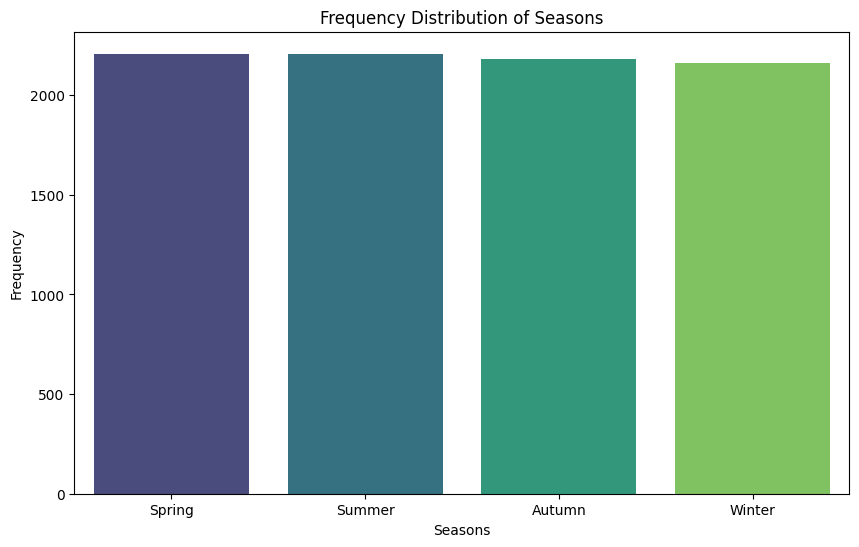

In [34]:
plt.figure(figsize=(10, 6))
sns.barplot(data=Seasons, x='Seasons', y='count', palette='viridis')#plots the bar graph
plt.xlabel('Seasons') # assigning x-axis name
plt.ylabel('Frequency')# assigning y-axis name
plt.title('Frequency Distribution of Seasons')# assigning title of the graph
plt.show()

##### 1. Why did you pick the specific chart?

**Bar plot**: A bar plot is used to visualize the relationship between categorical variable and a numerical variable. Here Seasons is a categorical variable and count is numerical variable.

##### 2. What is/are the insight(s) found from the chart?


The bar plot of the frequency of seasons reveals that the distribution of seasons in the dataset is relatively balanced, with no significant dominance of any particular season. However, it appears that the frequency of each season varies slightly, with some seasons being slightly more prevalent than others. Overall, the data suggests a relatively uniform distribution of seasons throughout the dataset.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact**: A balanced distribution of seasons indicates that the bike-sharing business can potentially attract customers consistently throughout the year, leading to stable revenue streams and customer engagement.

**Negative Business Impact**: However, slight variations in the frequency of seasons may require adjusting operational strategies and resource allocation to accommodate fluctuations in demand, potentially leading to increased operational costs or underutilization of resources during less prevalent seasons.

#### **Chart - 2 Frequency Distribution of Holiday**

In [35]:
# Chart - 2 visualization code
Holiday= Bike_df['Holiday'].value_counts() #gives the count of unique values
Holiday= pd.DataFrame(Holiday).reset_index() #converts the file into dataframe format/tabular format
Holiday

Holiday  count
0  No Holiday   8328
1     Holiday    432

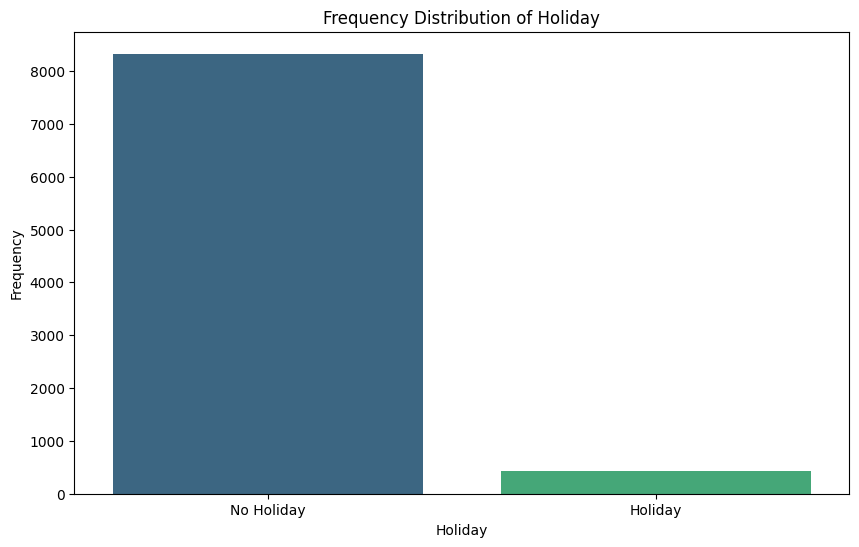

In [36]:
plt.figure(figsize=(10, 6))
sns.barplot(data=Holiday, x='Holiday', y='count', palette='viridis')#plots the bar graph
plt.xlabel('Holiday') # assigning x-axis name
plt.ylabel('Frequency')# assigning y-axis name
plt.title('Frequency Distribution of Holiday')# assigning title of the graph
plt.show()

##### 1. Why did you pick the specific chart?

**Bar plot**: A bar plot is used to visualize the relationship between categorical variable and a numerical variable. Here Holiday is a categorical variable and count is numerical variable.

##### 2. What is/are the insight(s) found from the chart?

The bar plot shows that there are more instances of non-holiday days compared to holidays, indicating that the majority of the observations in the dataset occur on regular working days. This insight suggests that the bike rental service may experience higher demand on weekdays compared to holidays.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


**Positive Business Impact**: The frequency distribution of holidays could be identifying peak periods of demand, allowing for targeted marketing or promotions during these times.

**Negative Business Impact**: It might involve potential revenue loss due to increased operational costs or decreased customer availability on holidays, necessitating careful resource management strategies.

#### **Chart - 3 Frequency Distribution of Humidity**

In [37]:
# Chart - 3 visualization code
Humidity= Bike_df['Humidity'].value_counts() #gives the count of unique values
Humidity= pd.DataFrame(Humidity).reset_index() #converts the file into dataframe format/tabular format
Humidity

Humidity  count
0         53    173
1         97    173
2         43    164
3         57    159
4         56    157
..       ...    ...
85        19     11
86        13      3
87        10      1
88        12      1
89        11      1

[90 rows x 2 columns]

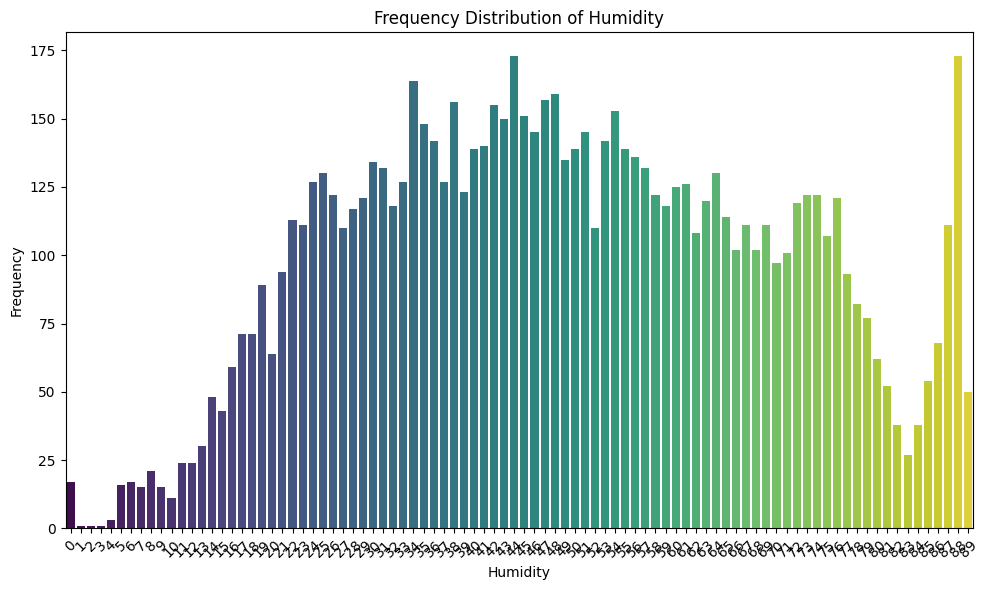

In [38]:
plt.figure(figsize=(10, 6))
sns.barplot(data=Humidity, x='Humidity', y='count', palette='viridis') # plots the bar graph
plt.xlabel('Humidity') # assigning x-axis name
plt.ylabel('Frequency') # assigning y-axis name
plt.title('Frequency Distribution of Humidity') # assigning title of the graph
plt.xticks(rotation=45) # rotate x-axis labels for better readability
plt.tight_layout()
# Customizing humidity values on the x-axis
plt.xticks(ticks=plt.xticks()[0], labels=[str(int(i)) for i in plt.xticks()[0]])
plt.show()

##### 1. Why did you pick the specific chart?

**Bar plot**: A bar plot is used to visualize the relationship between categorical variable and a numerical variable. Here Humidity is a categorical variable and count is numerical variable.

##### 2. What is/are the insight(s) found from the chart?


 Insights might include identifying common humidity ranges and understanding their occurrence frequencies, which could inform decisions related to environmental conditions affecting various activities such as outdoor events, agriculture, or HVAC system optimization.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact**: The positive business impact of the frequency distribution of humidity plot could involve better understanding of environmental conditions affecting customer behavior, enabling tailored marketing or operational adjustments.

**Negative Business Impact**: Conversely, the negative impact might entail challenges in managing service disruptions or customer dissatisfaction during extreme humidity conditions, necessitating proactive mitigation strategies.

#### **Chart - 4 Frequency Distribution of Functioning Day**

In [41]:
# Chart - 4 visualization code
Functioning_Day= Bike_df['Functioning_Day'].value_counts() #gives the count of unique values
Functioning_Day= pd.DataFrame(Functioning_Day).reset_index() #converts the file into dataframe format/tabular format
Functioning_Day

Functioning_Day  count
0             Yes   8465
1              No    295

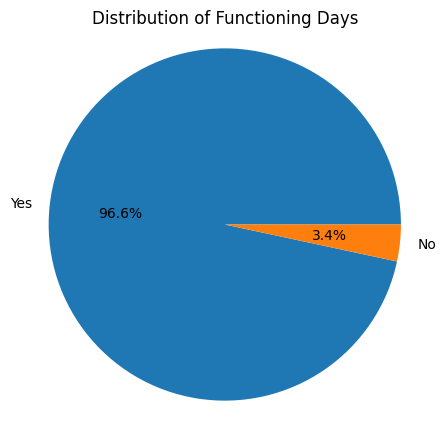

In [42]:
plt.figure(figsize=(5, 5))#defining the size of plot
plt.pie(Functioning_Day['count'], labels=Functioning_Day['Functioning_Day'], autopct='%1.1f%%') #creates pie plot
plt.title('Distribution of Functioning Days') #assigning title of the graph
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

##### 1. Why did you pick the specific chart?

**Pie Chart** - A pie chart is a circular chart divided into sectors, each representing a proportion of the whole. They are commonly used to show relative proportions of a set of values or to compare parts of a whole. Pie charts are easy to read and provide a quick visual summary of the data.

##### 2. What is/are the insight(s) found from the chart?

From the plot, it's evident that a majority of the observed days are functioning days, comprising approximately 96.6% of the dataset, while non-functioning days represent the remaining 3.4%. This highlights the predominant occurrence of functioning days within the dataset.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


**Positive Business Impact**: The positive impact is that the high proportion of functioning days (96.6%) indicates a strong operational uptime for the observed system, potentially fostering trust and reliability among users. This could lead to increased customer satisfaction and loyalty.

**Negative Business Impact**: The negative impact could be that the low occurrence of non-functioning days (3.4%) might suggest a lack of flexibility or downtime for maintenance or other necessary operational adjustments. This inflexibility could potentially lead to challenges in implementing necessary updates or improvements to the system without disrupting service.

# Bivariate and Multivariate analysis

#### **Chart - 5 Count of Rented Bikes According to month**

In [43]:
# Chart - 5 visualization code
Rented_Bike_Count= Bike_df['Rented_Bike_Count'].value_counts() #gives the count of unique values
Rented_Bike_Count= pd.DataFrame(Rented_Bike_Count).reset_index() #converts the file into dataframe format/tabular format
Rented_Bike_Count = Rented_Bike_Count.rename(columns={'index':'count','count':'month'}) # renaming the dataframe columns
Rented_Bike_Count

Rented_Bike_Count  month
0                     0    295
1                   122     19
2                   223     19
3                   262     19
4                   165     18
...                 ...    ...
2161               2096      1
2162               2440      1
2163               1600      1
2164               3384      1
2165                595      1

[2166 rows x 2 columns]

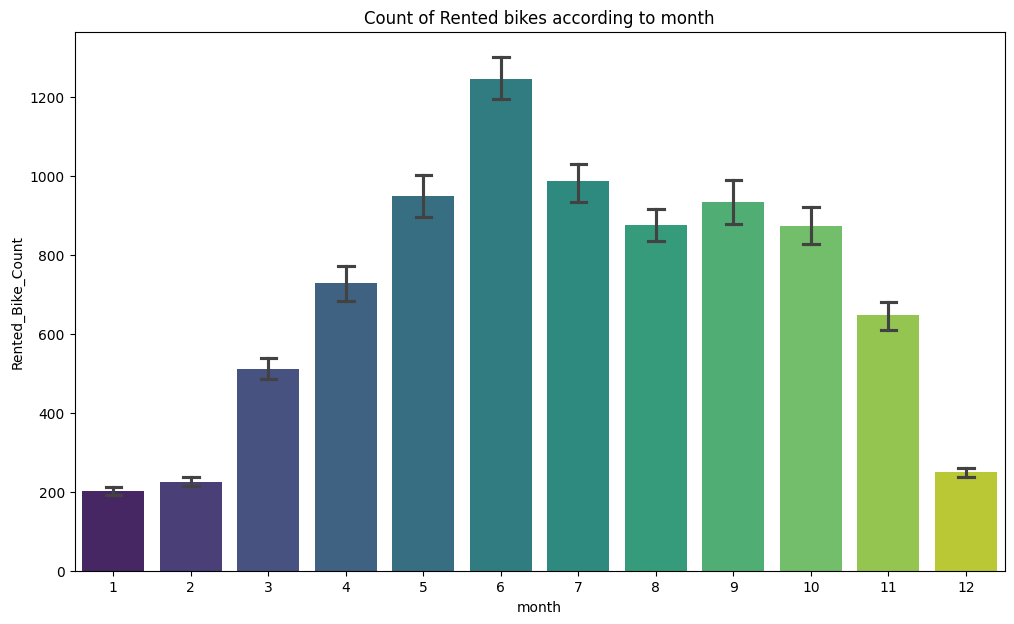

In [44]:
plt.figure(figsize=(12, 7)) #defining the size of plot
sns.barplot(data=Bike_df, x='month', y='Rented_Bike_Count',palette='viridis', capsize=.2) # plots the bar graph
plt.title('Count of Rented bikes according to month') #assigning title of the graph
plt.show()

##### 1. Why did you pick the specific chart?

**Bar plot**: A bar plot is used to visualize the relationship between categorical variable and a numerical variable. Here Rented bike count is a categorical variable and month is numerical variable.

##### 2. What is/are the insight(s) found from the chart?

The bar plot illustrates the fluctuation in rented bike counts across months. It appears that certain months experience higher demand for rented bikes compared to others, suggesting potential seasonality or external factors influencing bike usage patterns.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


**Positive Business impacts:**

**Optimized Resource Allocation:** Understanding seasonal variations helps bike rental services allocate resources efficiently, ensuring an adequate supply of bikes during peak demand months.

**Improved Business Planning:** Recognizing patterns allows for better forecasting and strategic planning, enabling businesses to capitalize on high-demand periods and adjust operations accordingly.

**Negative Business impacts:**

**Potential Revenue Loss:** Lower demand months may result in reduced revenue if resources aren't appropriately managed, leading to underutilized bikes and infrastructure.

**Operational Challenges:** Fluctuating demand requires adaptable operational strategies, which could increase complexity and operational costs for bike rental businesses.

#### **Chart - 6 Count of Rented bikes acording to weekdays_weekend**

In [45]:
# Chart - 6 visualization code
Rented_Bike_Count= Bike_df['Rented_Bike_Count'].value_counts() #gives the count of unique values
Rented_Bike_Count= pd.DataFrame(Rented_Bike_Count).reset_index() #converts the file into dataframe format/tabular format
Rented_Bike_Count = Rented_Bike_Count.rename(columns={'index':'count','count':'weekdays_weekend'}) # renaming the dataframe columns
Rented_Bike_Count

Rented_Bike_Count  weekdays_weekend
0                     0               295
1                   122                19
2                   223                19
3                   262                19
4                   165                18
...                 ...               ...
2161               2096                 1
2162               2440                 1
2163               1600                 1
2164               3384                 1
2165                595                 1

[2166 rows x 2 columns]

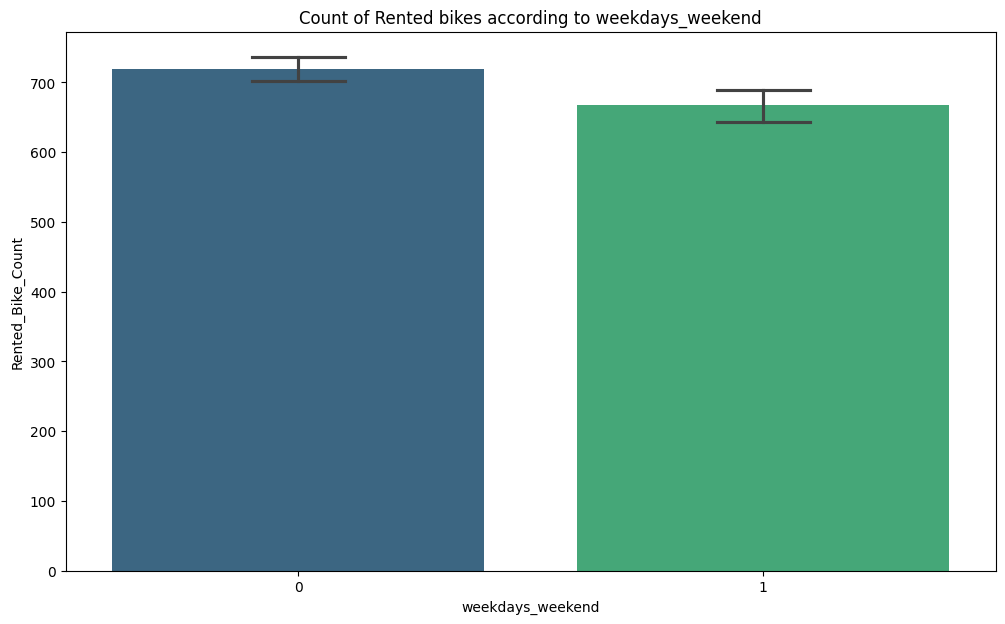

In [46]:
plt.figure(figsize=(12, 7)) #defining the size of plot
sns.barplot(data=Bike_df, x='weekdays_weekend', y='Rented_Bike_Count',palette='viridis', capsize=.2) # plots the bar graph
plt.title('Count of Rented bikes according to weekdays_weekend') #assigning title of the graph
plt.show()

##### 1. Why did you pick the specific chart?

**Bar plot:** A bar plot is used to visualize the relationship between categorical variable and a numerical variable. Here Rented bike count is a categorical variable and weekdays_weekend is numerical variable.

##### 2. What is/are the insight(s) found from the chart?

The plot shows the count of rented bikes based on weekdays and weekends. It appears that there's a noticeable difference in bike rental counts between weekdays and weekends. Weekdays likely see higher bike usage, possibly due to commuting purposes, while weekends have lower counts, indicating more leisurely or recreational use of bikes.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


**Positive Business Impact:**

**Increased Weekday Demand:** Higher bike rental counts on weekdays suggest potential for increased revenue from commuters or individuals using bikes for daily transportation.

**Diversified Service:** Recognizing lower demand on weekends allows the business to potentially adjust resources or marketing efforts to cater to leisure or tourism markets, expanding customer reach and revenue opportunities.

**Negative Business Impact:**

**Weekend Revenue Loss:** Lower bike rental counts on weekends could result in reduced revenue during those periods, potentially impacting overall profitability.

**Resource Management Challenges:** Fluctuating demand between weekdays and weekends may present operational challenges in managing bike inventory and staffing levels efficiently.

#### **Chart - 7 Count of Rented bikes according to Hour**

In [47]:
# Chart - 7 visualization code
Rented_Bike_Count= Bike_df['Rented_Bike_Count'].value_counts() #gives the count of unique values
Rented_Bike_Count= pd.DataFrame(Rented_Bike_Count).reset_index() #converts the file into dataframe format/tabular format
Rented_Bike_Count = Rented_Bike_Count.rename(columns={'index':'count','count':'Hour'}) # renaming the dataframe columns
Rented_Bike_Count

Rented_Bike_Count  Hour
0                     0   295
1                   122    19
2                   223    19
3                   262    19
4                   165    18
...                 ...   ...
2161               2096     1
2162               2440     1
2163               1600     1
2164               3384     1
2165                595     1

[2166 rows x 2 columns]

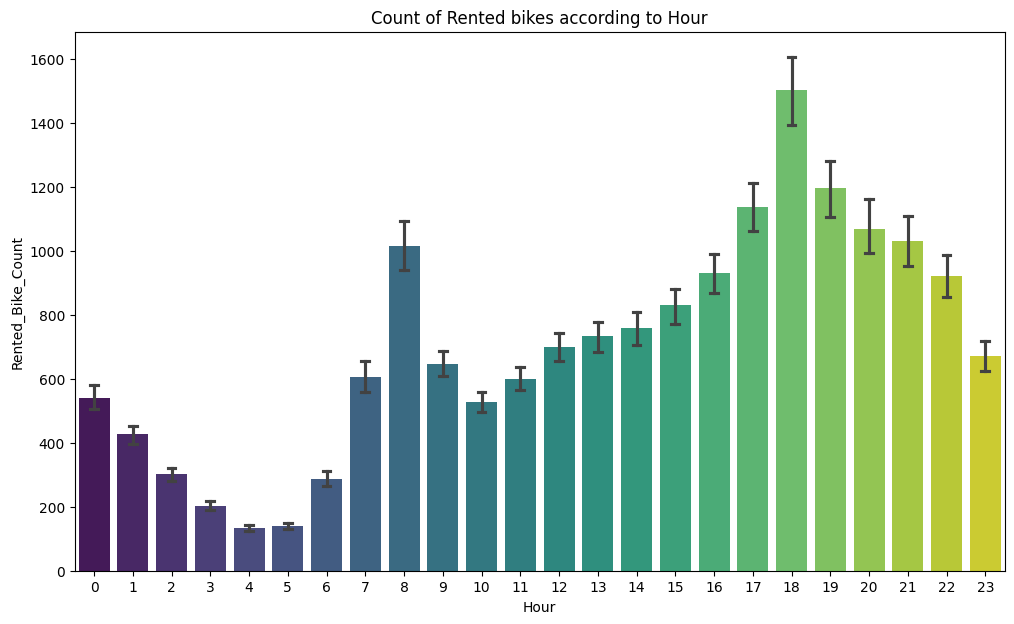

In [48]:
plt.figure(figsize=(12, 7)) #defining the size of plot
sns.barplot(data=Bike_df, x='Hour', y='Rented_Bike_Count',palette='viridis', capsize=.2) # plots the bar graph
plt.title('Count of Rented bikes according to Hour') #assigning title of the graph
plt.show()

##### 1. Why did you pick the specific chart?

**Bar plot:** A bar plot is used to visualize the relationship between categorical variable and a numerical variable. Here Rented bike count is a categorical variable and Hour is numerical variable.

##### 2. What is/are the insight(s) found from the chart?

It shows the count of rented bikes throughout the day. It appears that there are peak hours during which bike rentals are high, likely corresponding to rush hours or times of high activity. This suggests potential patterns in bike usage that could be further explored or utilized for optimizing bike-sharing services.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**

**Optimization Opportunities:** Identifying peak hours allows for better resource allocation, leading to improved operational efficiency and customer satisfaction.

**Enhanced Service Planning:** Understanding usage patterns enables tailored service offerings and targeted marketing strategies, fostering customer loyalty and revenue growth.

**Negative Business Impact:**

**Overlooking Diversity:** Focusing solely on peak hours may overlook potential off-peak market segments, limiting revenue potential and customer reach.

**Limited Context:** Without additional contextual data, such as weather or special events, conclusions drawn solely from peak hours may lack depth and accuracy, potentially leading to suboptimal decision-making.

#### **Chart - 8 Count of Rented bikes acording to Seasons**

In [49]:
# Chart - 8 visualization code
Rented_Bike_Count= Bike_df['Rented_Bike_Count'].value_counts() #gives the count of unique values
Rented_Bike_Count= pd.DataFrame(Rented_Bike_Count).reset_index() #converts the file into dataframe format/tabular format
Rented_Bike_Count = Rented_Bike_Count.rename(columns={'index':'count','count':'Seasons'}) # renaming the dataframe columns
Rented_Bike_Count

Rented_Bike_Count  Seasons
0                     0      295
1                   122       19
2                   223       19
3                   262       19
4                   165       18
...                 ...      ...
2161               2096        1
2162               2440        1
2163               1600        1
2164               3384        1
2165                595        1

[2166 rows x 2 columns]

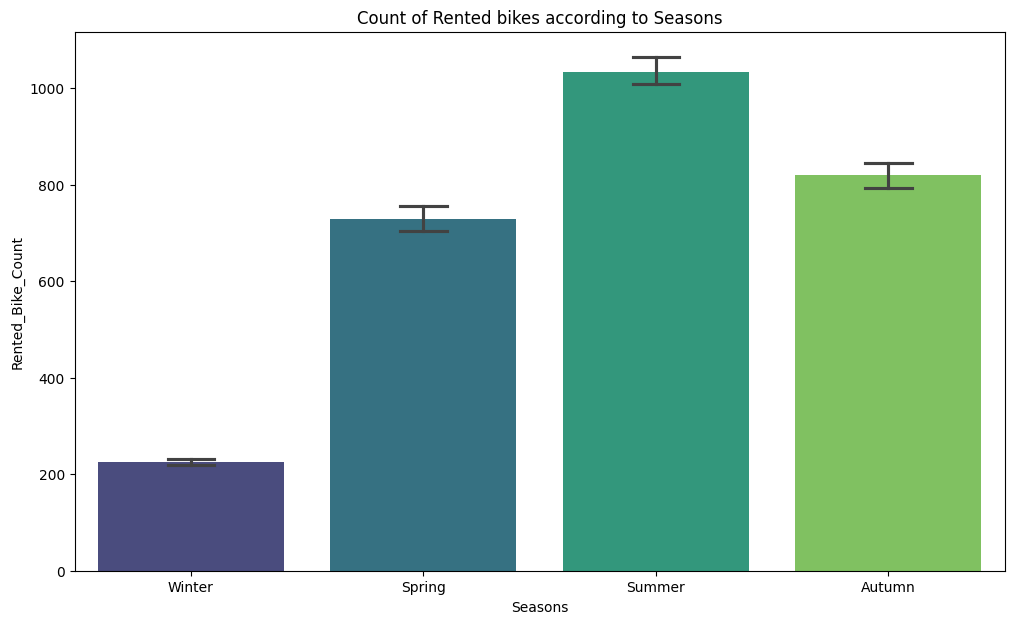

In [50]:
plt.figure(figsize=(12, 7)) #defining the size of plot
sns.barplot(data=Bike_df, x='Seasons', y='Rented_Bike_Count',palette='viridis', capsize=.2) # plots the bar graph
plt.title('Count of Rented bikes according to Seasons') #assigning title of the graph
plt.show()

##### 1. Why did you pick the specific chart?

**Bar plot:** A bar plot is used to visualize the relationship between categorical variable and a numerical variable. Here Rented bike count is a categorical variable and Seasons is numerical variable.

##### 2. What is/are the insight(s) found from the chart?

The chart displays fluctuations in bike counts across various seasons. Summer exhibits the highest demand, followed by autumn, then spring, and finally winter, where demand is the lowest.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


**Positive Business Impact:**

**Seasonal Adaptation:** Understanding seasonal demand variations enables businesses to adjust inventory, staffing, and marketing strategies accordingly, maximizing profitability during peak seasons.

**Forecasting Accuracy:** By recognizing seasonal trends, businesses can improve demand forecasting accuracy, minimizing stockouts and excess inventory costs.

**Negative Business Impact:**

**Resource Allocation Challenges:** Heavy reliance on seasonal demand may lead to underutilization of resources during off-peak seasons, potentially resulting in financial strain and operational inefficiencies.

**Limited Flexibility:** Overemphasizing seasonal patterns may restrict businesses from capitalizing on emerging market opportunities or adapting to unforeseen changes, hindering long-term sustainability.

#### **Chart - 9 Count of Rented bikes according to Holiday**

In [51]:
# Chart - 9 visualization code
Rented_Bike_Count= Bike_df['Rented_Bike_Count'].value_counts() #gives the count of unique values
Rented_Bike_Count= pd.DataFrame(Rented_Bike_Count).reset_index() #converts the file into dataframe format/tabular format
Rented_Bike_Count = Rented_Bike_Count.rename(columns={'index':'count','count':'Holiday'}) # renaming the dataframe columns
Rented_Bike_Count

Rented_Bike_Count  Holiday
0                     0      295
1                   122       19
2                   223       19
3                   262       19
4                   165       18
...                 ...      ...
2161               2096        1
2162               2440        1
2163               1600        1
2164               3384        1
2165                595        1

[2166 rows x 2 columns]

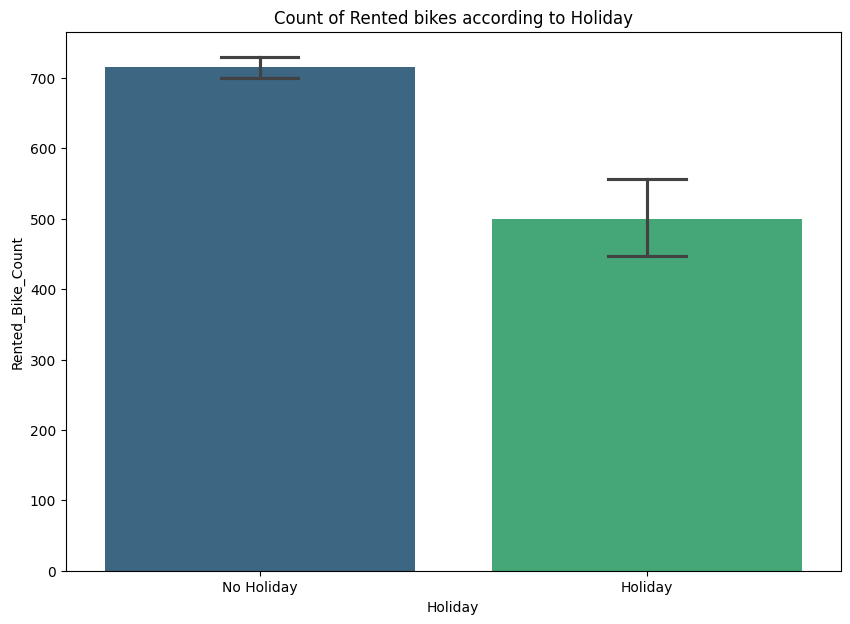

In [52]:
plt.figure(figsize=(10, 7)) #defining the size of plot
sns.barplot(data=Bike_df, x='Holiday', y='Rented_Bike_Count',palette='viridis', capsize=.2) # plots the bar graph
plt.title('Count of Rented bikes according to Holiday') #assigning title of the graph
plt.show()

##### 1. Why did you pick the specific chart?

**Bar plot:** A bar plot is used to visualize the relationship between categorical variable and a numerical variable. Here Rented bike count is a categorical variable and Holiday is numerical variable.

##### 2. What is/are the insight(s) found from the chart?

Bike rentals experience significantly higher demand on non-holidays compared to holidays, indicating a preference for renting bikes during working days over holidays. This trend underscores a distinct consumer behavior favoring bike usage for commuting or daily activities rather than leisure or holiday pursuits.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


**Positive Business Impact:**

**Targeted Resource Allocation** Understanding the preference for bike rentals on non-holidays allows businesses to allocate resources more effectively during peak periods, maximizing revenue and customer satisfaction.

**Operational Efficiency:** Catering to the demand for commuting or daily activities on working days can streamline operations, potentially reducing idle inventory and optimizing service delivery.

**Negative Business Impact:**

**Missed Revenue Opportunities:** Overemphasis on non-holiday demand may lead to underutilization of resources during holiday periods, potentially missing out on revenue streams and market segments.

**Limited Market Diversity:** Focusing solely on commuter demand may neglect potential leisure or holiday rental markets, limiting overall revenue potential and customer reach.

#### **Chart - 10 Distribution of Numeric Features**

In [53]:
# separate numerical features from the dataframe
numeric_features= Bike_df.select_dtypes(exclude=['object','category'])
numeric_features

Rented_Bike_Count  Temperature  Humidity  Wind_speed  Visibility  \
0                   254         -5.2        37         2.2        2000   
1                   204         -5.5        38         0.8        2000   
2                   173         -6.0        39         1.0        2000   
3                   107         -6.2        40         0.9        2000   
4                    78         -6.0        36         2.3        2000   
...                 ...          ...       ...         ...         ...   
8755               1003          4.2        34         2.6        1894   
8756                764          3.4        37         2.3        2000   
8757                694          2.6        39         0.3        1968   
8758                712          2.1        41         1.0        1859   
8759                584          1.9        43         1.3        1909   

      Dew_point_temperature  Solar_Radiation  Rainfall  Snowfall  
0                     -17.6              0.0       0.0       0.0  
1                     -17.6              0.0       0.0       0.0  
2                     -17.7              0.0       0.0       0.0  
3                     -17.6              0.0       0.0       0.0  
4                     -18.6              0.0       0.0       0.0  
...                     ...              ...       ...       ...  
8755                  -10.3              0.0       0.0       0.0  
8756                   -9.9              0.0       0.0       0.0  
8757                   -9.9              0.0       0.0       0.0  
8758                   -9.8              0.0       0.0       0.0  
8759                   -9.3              0.0       0.0       0.0  

[8760 rows x 9 columns]

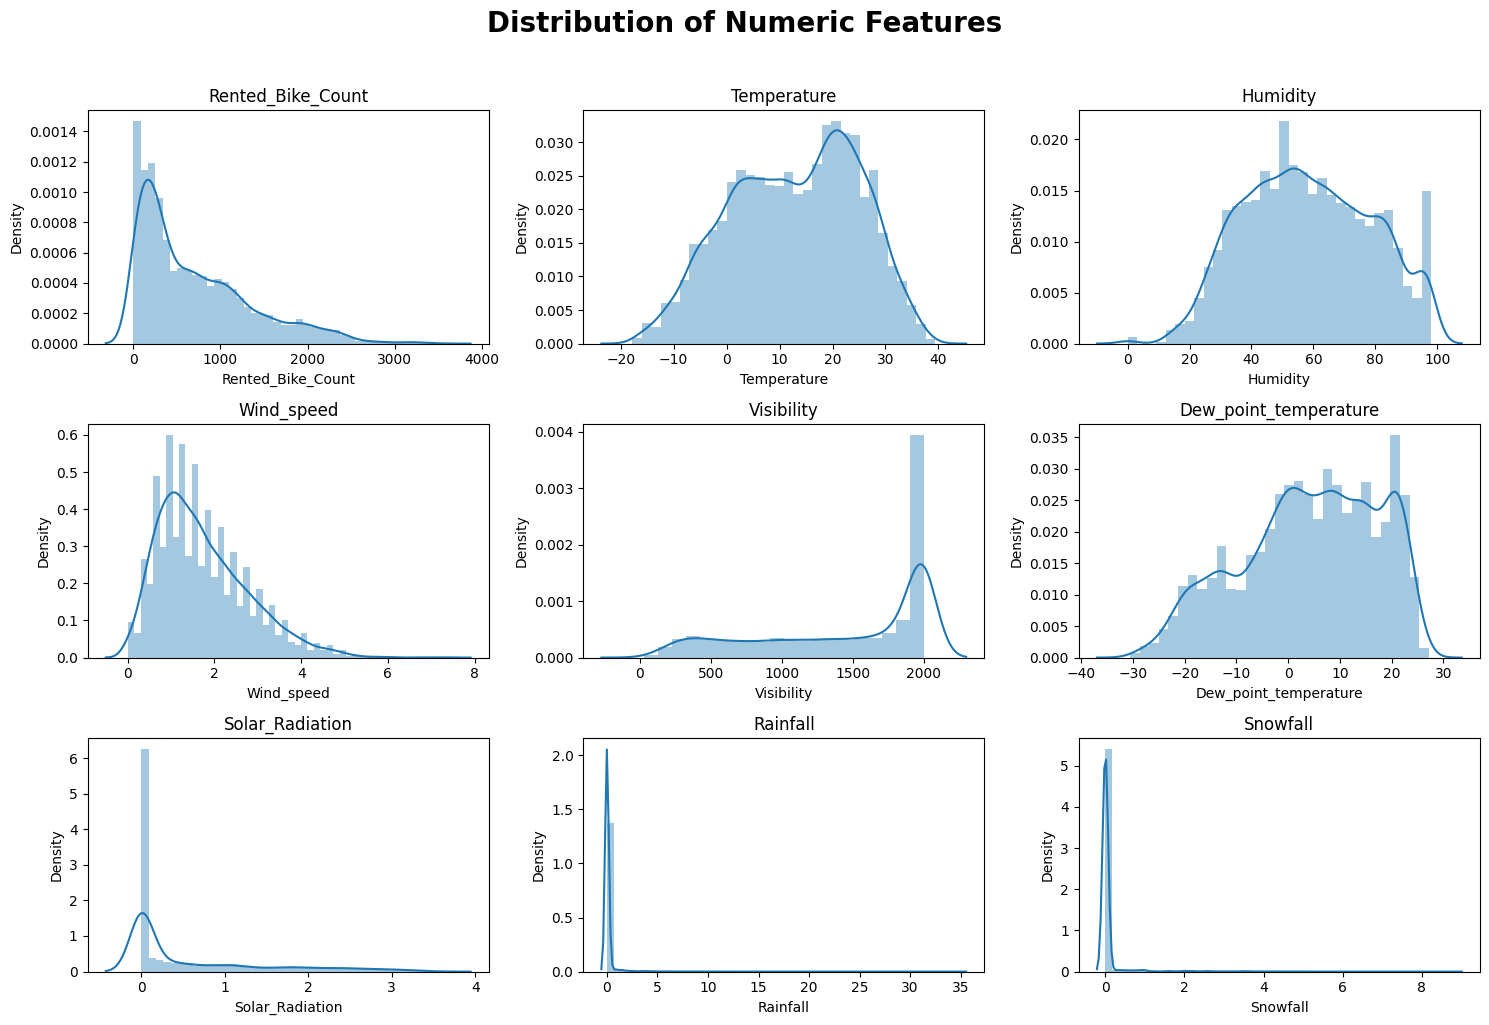

In [54]:
# Chart - 10 visualization code
# printing displots to analyze the distribution of all numerical features

n=1
plt.figure(figsize=(15,10)) #defining the size of plot
for i in numeric_features.columns:
  plt.subplot(3,3,n)
  n=n+1
  sns.distplot(Bike_df[i])
  plt.title(i)
  plt.tight_layout()
  plt.suptitle("Distribution of Numeric Features", fontsize = 20, fontweight = 'bold', y=1.02)#assigning the title of the graph
plt.show()

**Observations:**

For numerical features, we can see that the majority of distributions are right-skewed and few are left-skewed and tempareture and humidity is closed to normal distribution.

**Right-skewed columns:** Rented Bike Count, Wind speed, Solar Radiation, Rainfall & Snowfall.

**Left-skewed columns:** Visibility & Dew point temperature

#### **Chart - 11 Season-wise monthly Rented Bike Count**

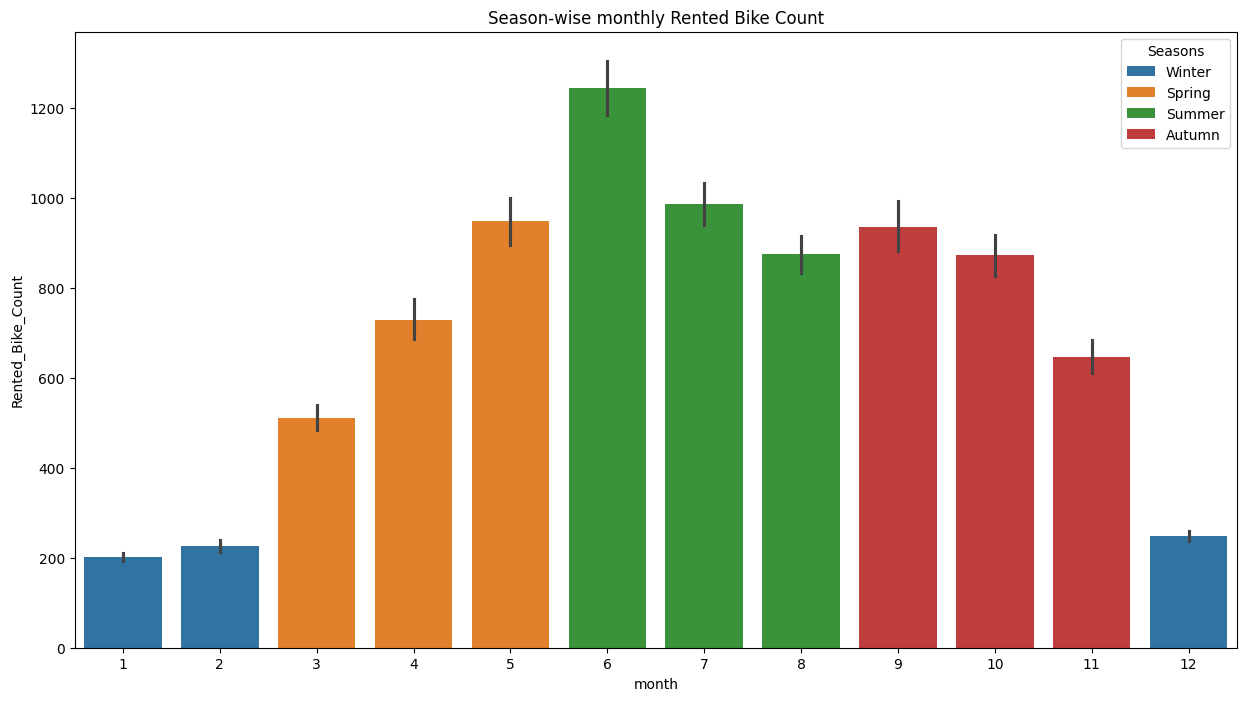

In [55]:
# Chart - 11 visualization code
fig,ax=plt.subplots(figsize=(15,8))#defining the size of plot
sns.barplot(x='month',y='Rented_Bike_Count',data= Bike_df, hue='Seasons',ax=ax) # Creates the bar plot
ax.set_title('Season-wise monthly Rented Bike Count')#assigning the title of the graph
plt.show()

##### 1. Why did you pick the specific chart?

**Bar plot**: A bar plot is used to visualize the relationship between categorical variable and a numerical variable. Here Rented_Bike_Count and Seasons is a categorical variable and month is numerical variable.

##### 2. What is/are the insight(s) found from the chart?

The chart displays the distribution of rented bikes across months and seasons, indicating a significant peak in demand during June compared to other months. Conversely, the lowest bike rentals occur at the beginning of the year.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


**Positive Business Impact:**

**Seasonal Strategy Alignment:** Understanding peak demand in June allows businesses to tailor their offerings and marketing efforts, maximizing revenue during high-demand periods.

**Operational Efficiency:** Recognizing low rental rates at the beginning of the year enables businesses to adjust inventory and staffing levels, optimizing resource allocation to minimize costs during off-peak periods.

**Negative Business Impact:**

**Overreliance on Peak Season:** Heavy focus on June's high demand may lead to neglect of other months, potentially missing out on revenue opportunities and market segments.

**Seasonal Vulnerability:** Dependence on seasonal fluctuations exposes the business to risks such as revenue variability and resource underutilization during off-peak months, affecting overall financial stability.

#### **Chart - 12 Bivariate Analysis of Numerical Features**

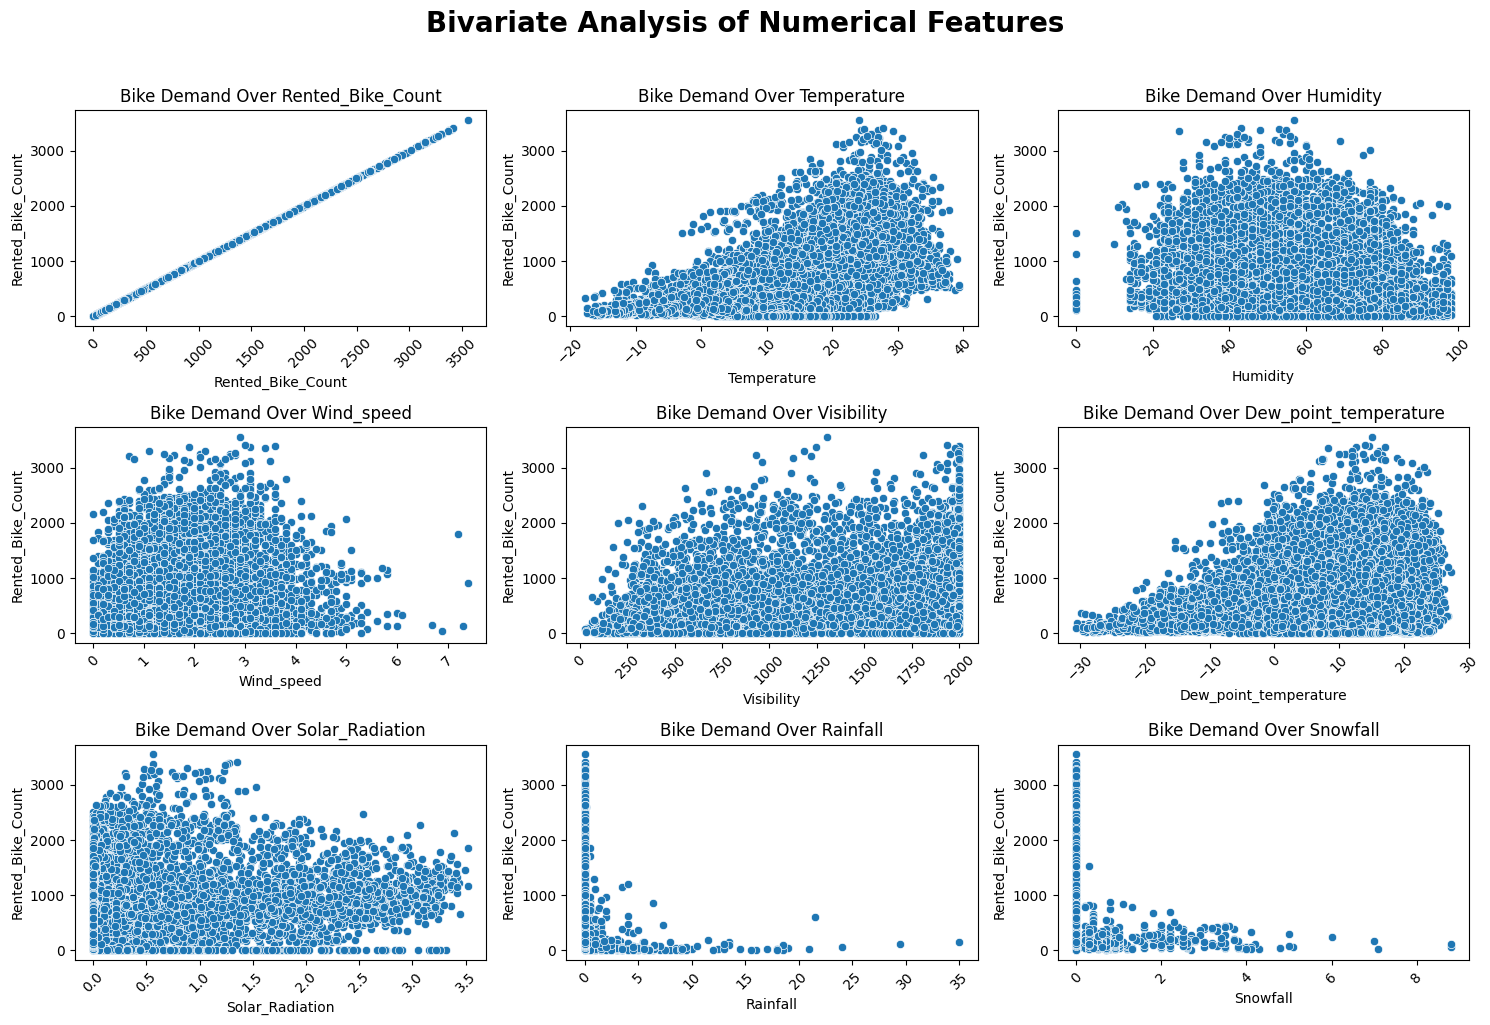

In [56]:
plt.figure(figsize=(15, 10))#defining the size of plot
plt.suptitle('Bivariate Analysis of Numerical Features', fontsize=20, fontweight='bold', y=1.02)

# Selecting only numeric columns
numeric_columns = Bike_df.select_dtypes(include='number').columns

for index, col in enumerate(numeric_columns):
    # Subplots of 3 rows and 3 columns
    plt.subplot(3, 3, index+1)

    # Scatter plots
    sns.scatterplot(x=Bike_df[col], y=Bike_df['Rented_Bike_Count']) # Creates the scatter plot

    plt.title(f'Bike Demand Over {col}') #assigning the title of the graph
    plt.xticks(rotation=45) # Rotate x-axis labels for better readability
    plt.tight_layout()

plt.show()

##### 1. Why did you pick the specific chart?

**Scatter Plot**:

A scatter plot is a type of plot that displays the relationship between two variables as a set of points. It is used to show the correlation between two variables.

##### 2. What is/are the insight(s) found from the chart?

The scatter plot illustrates the relationship between various numerical features and the count of rented bikes. Insights may include identifying correlations or patterns between specific features and bike demand, highlighting potential factors influencing rental behavior such as weather, time of day, or promotional events.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


**Positive Impact:**

**Informed Decision-Making:** Understanding correlations between numerical features and bike demand enables data-driven decisions for resource allocation, marketing strategies, and service enhancements, fostering business growth and customer satisfaction.

**Negative Impact:**

**Overlooking Complexity:** Relying solely on numerical correlations may oversimplify the multifaceted nature of bike rental behavior, potentially neglecting other influential factors like customer preferences or competitive dynamics, leading to incomplete or misguided strategies.

#### **Chart - 13 - Correlation Heatmap**

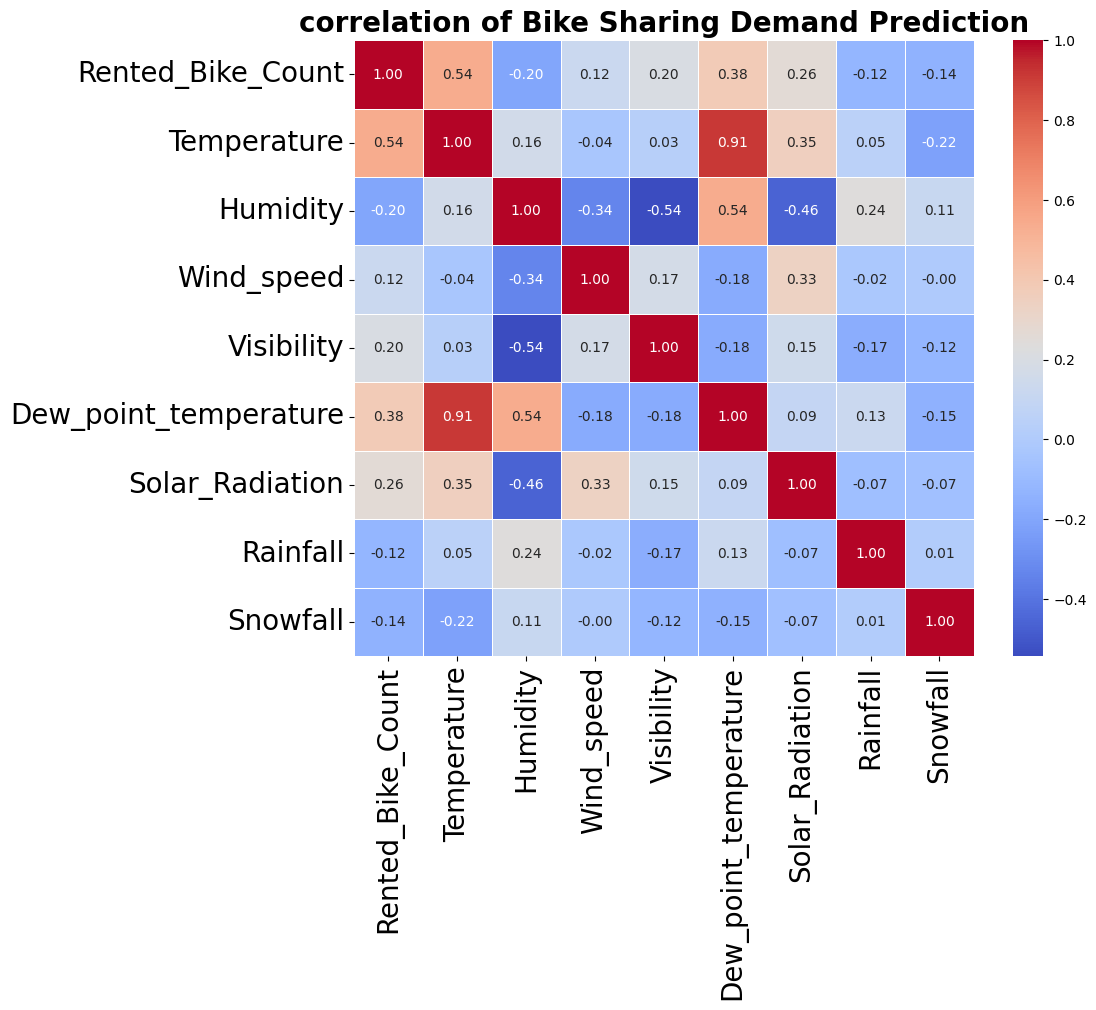

In [57]:
# Correlation Heatmap visualization code
plt.figure(figsize=(10,8)) #defining the size of plot
ax = sns.heatmap(Bike_df.corr(numeric_only=True), annot = True,linewidth = 0.5, fmt = '.2f', cmap = 'coolwarm') #creates the heat map
plt.title('correlation of Bike Sharing Demand Prediction', fontweight = 'bold', fontsize = 20) #assigning the title of the map
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

**-1 indicating a strong negative correlation**

**0 indicating no correlation**

**1 indicating a strong positive correlation between two variables**

##### 1. Why did you pick the specific chart?

**Heatmap**: A correlation heatmap is a graphical representation of a correlation matrix, where the correlation coefficients between multiple variables are displayed in a matrix format using colors to represent the strength and direction of the relationships between the variables. Correlation coefficients quantify the degree to which two variables are linearly related to each other.

##### 2. What is/are the insight(s) found from the chart?

The heatmap reveals significant correlations with the target variable.

**Positive correlations:** Temperature, dew point temperature, and solar radiation.

**Negative correlations:** humidity and rainfall show negative correlations.

However, 'Temperature' and 'Dew point temperature' exhibit a high positive correlation of 0.91, suggesting redundancy; thus, dropping 'Dew point temperature(°C)' wouldn't impact the analysis, as they share similar variations.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

**Hypothesis 1:** There is a significant difference in the average number of rented bike counts between holidays and non-holidays.

**Hypothesis 2:** The average temperature during functioning days differs from that during non-functioning days.

**Hypothesis 3:** There is a correlation between the wind speed and the amount of rainfall.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**For Hypothesis 1:** We can use a t-test or Mann-Whitney U test to compare the means of rented bike counts between holidays and non-holidays.

**Hypothesis 1:**
There is a significant difference in the average number of rented bike counts between holidays and non-holidays.

**Null Hypothesis (H0):**
There is no significant difference in the average number of rented bike counts between holidays and non-holidays.

**Alternative Hypothesis (H1):**
There is a significant difference in the average number of rented bike counts between holidays and non-holidays.

#### 2. Perform an appropriate statistical test.

In [58]:
# Perform Statistical Test to obtain P-Value
import scipy.stats as stats

# Splitting the data into holiday and non-holiday groups
holiday_counts = Bike_df[Bike_df['Holiday'] == 'Holiday']['Rented_Bike_Count']
non_holiday_counts = Bike_df[Bike_df['Holiday'] == 'No Holiday']['Rented_Bike_Count']

# Performing t-test
t_statistic, p_value = stats.ttest_ind(holiday_counts, non_holiday_counts)

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Conclusion
alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis: There is a significant difference in the average number of rented bike counts between holidays and non-holidays.")
else:
    print("Fail to reject null hypothesis: There is no significant difference in the average number of rented bike counts between holidays and non-holidays.")


T-statistic: -6.7874340454159166
P-value: 1.2156443235024855e-11
Reject null hypothesis: There is a significant difference in the average number of rented bike counts between holidays and non-holidays.


##### Which statistical test have you done to obtain P-Value?

For hypothesis 1, I used the independent samples t-test to obtain the p-value.
The t-test is used to determine if there is a statistically significant difference between the means of two independent groups. In this case, it compares the average number of rented bike counts between holidays and non-holidays to determine if there is a significant difference. The null hypothesis (H0) states that there is no difference in means, while the alternative hypothesis (H1) suggests there is a difference. The p-value obtained from the t-test indicates the probability of observing such a difference if the null hypothesis is true. If the p-value is less than a predetermined significance level (usually 0.05), we reject the null hypothesis in favor of the alternative hypothesis.

##### Why did you choose the specific statistical test?

I chose the independent samples t-test because it is appropriate when comparing the means of two groups and assuming that the data is normally distributed. In hypothesis 1, we are comparing the mean number of rented bike counts between two distinct groups (holidays and non-holidays), making the independent samples t-test suitable for this analysis. Additionally, the t-test provides a p-value that indicates the probability of observing the obtained results under the null hypothesis, allowing us to determine whether the observed difference in means is statistically significant.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**For Hypothesis 2:** We can use a t-test to compare the means of temperature between functioning days and non-functioning days.

**Hypothesis 2:**
The average temperature during functioning days differs from that during non-functioning days.

**Null Hypothesis (H0):**
There is no significant difference in the average temperature between functioning days and non-functioning days.

**Alternative Hypothesis (H1):**
There is a significant difference in the average temperature between functioning days and non-functioning days.

#### 2. Perform an appropriate statistical test.

In [59]:
# Perform Statistical Test to obtain P-Value
# Splitting the data into functioning and non-functioning day groups
functioning_temp = Bike_df[Bike_df['Functioning_Day'] == 'Yes']['Temperature']
non_functioning_temp = Bike_df[Bike_df['Functioning_Day'] == 'No']['Temperature']

# Performing t-test
t_statistic, p_value = stats.ttest_ind(functioning_temp, non_functioning_temp)

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Conclusion
if p_value < alpha:
    print("Reject null hypothesis: There is a significant difference in the average temperature between functioning days and non-functioning days.")
else:
    print("Fail to reject null hypothesis: There is no significant difference in the average temperature between functioning days and non-functioning days.")


T-statistic: -4.70101589615965
P-value: 2.6282396902629655e-06
Reject null hypothesis: There is a significant difference in the average temperature between functioning days and non-functioning days.


##### Which statistical test have you done to obtain P-Value?

For hypothesis 2, I also used an independent samples t-test to obtain the p-value.
An independent samples t-test is a statistical test used to determine whether there is a significant difference between the means of two independent groups. In this case, the test compares the mean temperature between two independent groups: functioning days and non-functioning days.

##### Why did you choose the specific statistical test?

Similar to hypothesis 1, I chose the independent samples t-test because it is suitable for comparing the means of two groups when the data is normally distributed. In hypothesis 2, we are comparing the mean temperature between two distinct groups (functioning days and non-functioning days). Additionally, the t-test provides a p-value that indicates the probability of observing the obtained results under the null hypothesis, allowing us to determine whether the observed difference in means is statistically significant.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**For Hypothesis 3:** We can calculate the correlation coefficient between wind speed and rainfall and test for its significance using a correlation test such as Pearson's correlation or Spearman's correlation.

**Hypothesis 3:**
There is a correlation between the wind speed and the amount of rainfall.

**Null Hypothesis (H0):**
There is no correlation between wind speed and rainfall.

**Alternative Hypothesis (H1):**
There is a correlation between wind speed and rainfall.

#### 2. Perform an appropriate statistical test.

In [60]:
# Perform Statistical Test to obtain P-Value
# Performing correlation test
correlation_coefficient, p_value = stats.pearsonr(Bike_df['Wind_speed'], Bike_df['Rainfall'])

# Print the results
print("Correlation coefficient:", correlation_coefficient)
print("P-value:", p_value)

# Conclusion
if p_value < alpha:
    print("Reject null hypothesis: There is a significant correlation between wind speed and rainfall.")
else:
    print("Fail to reject null hypothesis: There is no significant correlation between wind speed and rainfall.")


Correlation coefficient: -0.019674088872894593
P-value: 0.06557625292132838
Fail to reject null hypothesis: There is no significant correlation between wind speed and rainfall.


##### Which statistical test have you done to obtain P-Value?

For hypothesis 3, I used Pearson's correlation test to obtain the p-value.Pearson's correlation test is a statistical test used to determine the strength and direction of the linear relationship between two continuous variables. It calculates the Pearson correlation coefficient, which measures the strength and direction of the linear relationship, along with the associated p-value, indicating the statistical significance of the correlation.

##### Why did you choose the specific statistical test?

I chose Pearson's correlation test because hypothesis 3 involves examining the relationship between two continuous variables: wind speed and rainfall. Pearson's correlation test is suitable for assessing the linear relationship between continuous variables and provides both the correlation coefficient and the associated p-value. This test helps determine whether there is a statistically significant correlation between wind speed and rainfall, which aligns with the objective of hypothesis 3.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [61]:
# Handling Missing Values & Missing Value Imputation
Bike_df.isnull().sum()

Rented_Bike_Count        0
Hour                     0
Temperature              0
Humidity                 0
Wind_speed               0
Visibility               0
Dew_point_temperature    0
Solar_Radiation          0
Rainfall                 0
Snowfall                 0
Seasons                  0
Holiday                  0
Functioning_Day          0
month                    0
weekdays_weekend         0
dtype: int64

There are no missing values in the dataset.

#### What all missing value imputation techniques have you used and why did you use those techniques?

The dataset does not contain any missing values.

### 2. Handling Outliers

In [62]:
# Dividing data into numerical and categorical features

categorical_features = Bike_df.select_dtypes(include = 'object')
numerical_features = Bike_df.select_dtypes(exclude = 'object')

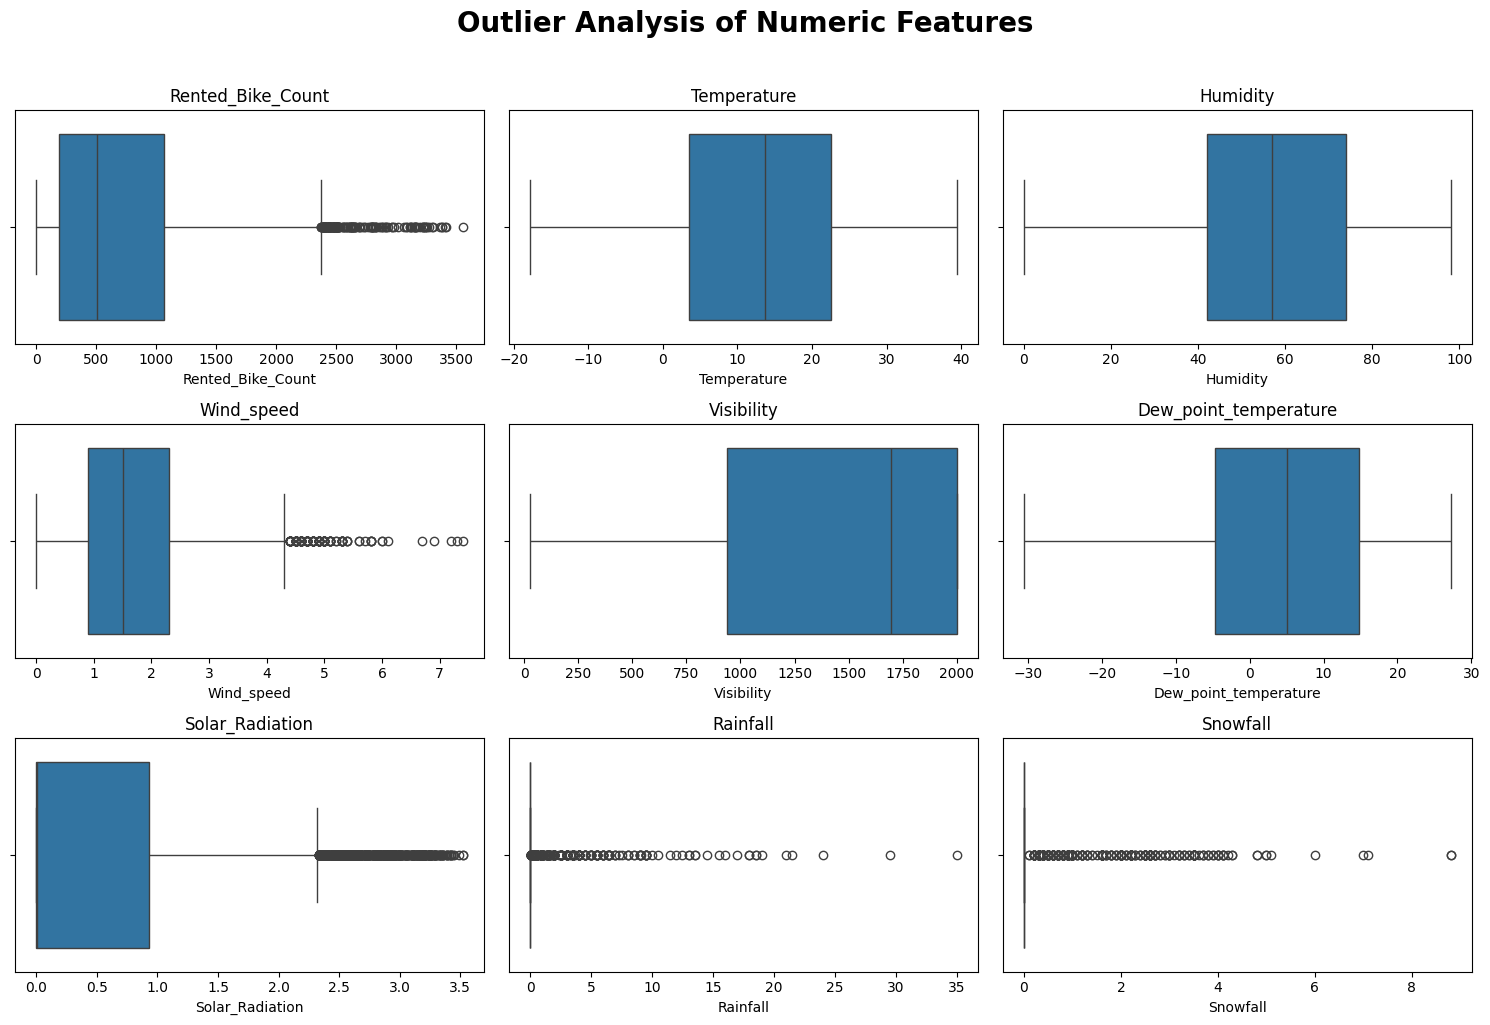

In [63]:
# Handling Outliers & Outlier treatments
#Creating a boxplot to detect columns with outliers
plt.figure(figsize=(15, 10))
plt.suptitle('Outlier Analysis of Numeric Features', fontsize=20, fontweight='bold', y=1.02) # assigning title of the graph

# Define numerical features
numerical_features = Bike_df.select_dtypes(include=['int', 'float']).columns.tolist()

for index, col in enumerate(numerical_features):
    # Subplots 3 rows, 3 columns
    plt.subplot(3, 3, index + 1)

    # Boxplots
    sns.boxplot(x=Bike_df[col])  #plots the box graph

    plt.title(col)
    plt.tight_layout()


Here we can see that the columns that contain outliers are Rented Bike Count, Windspeed, Solar Radiation, Rainfall&Snowfall.

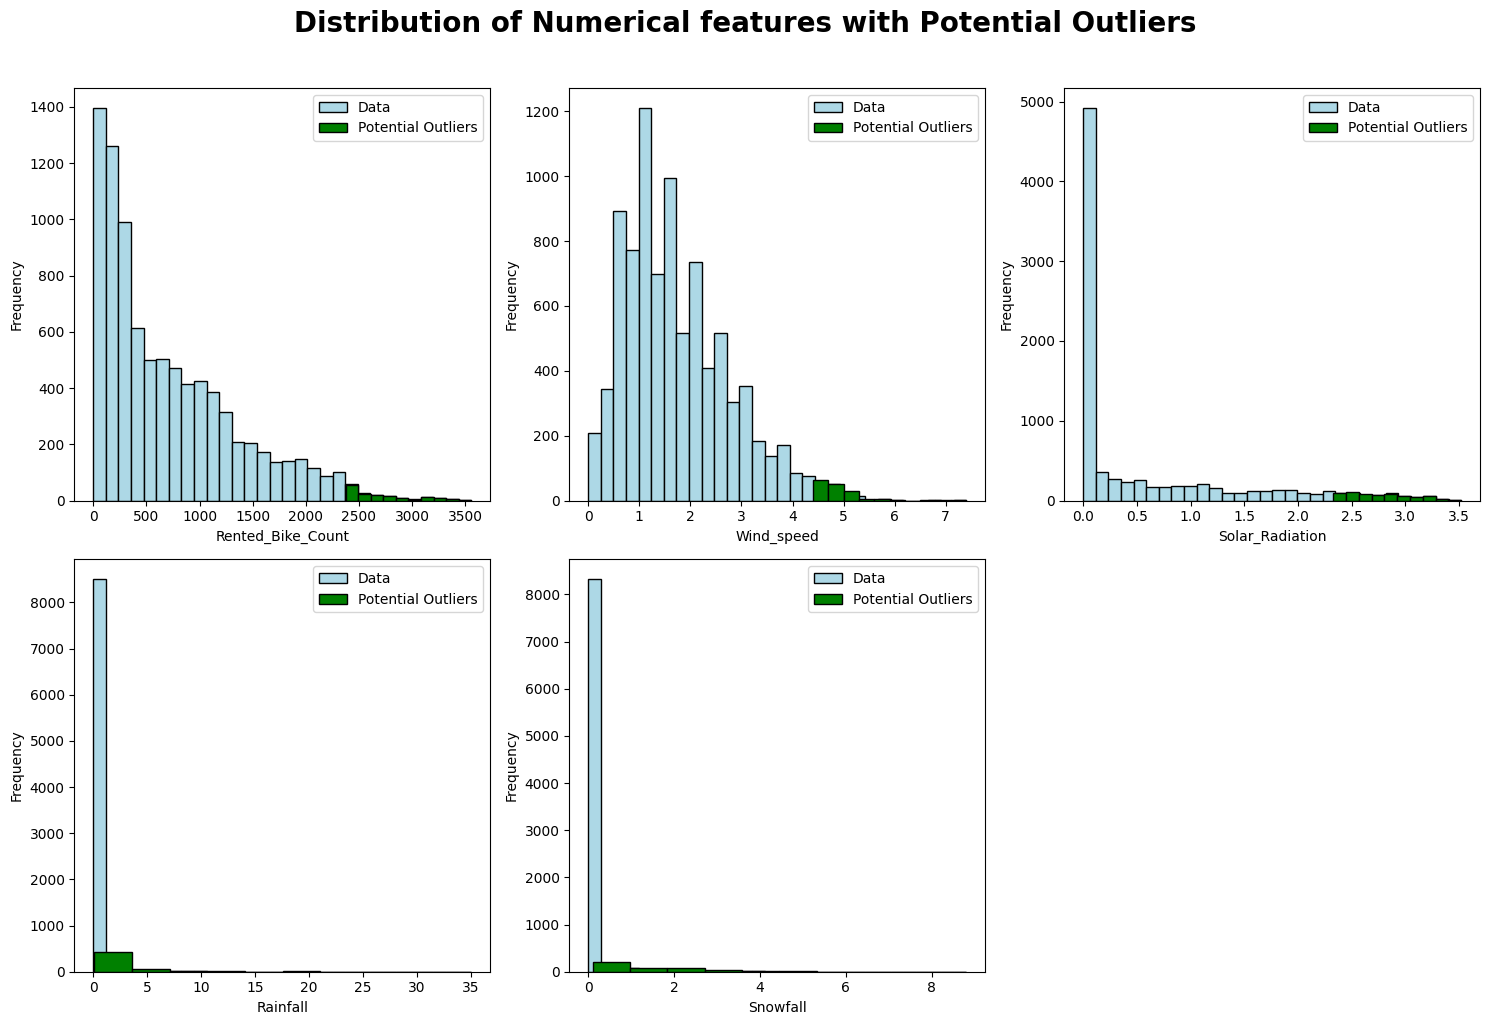

In [64]:
# Identifying potential outliers
outlier_cols = ['Rented_Bike_Count', 'Wind_speed', 'Solar_Radiation', 'Rainfall', 'Snowfall']  # Example list of columns you want to analyze for outliers

# Assuming calculate_ranges function is defined elsewhere
def calculate_ranges(df, col):
    # Placeholder implementation, replace with actual logic
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return upper_bound, lower_bound

plt.figure(figsize=(15, 10))

# Determine the number of rows and columns needed for subplots
num_cols = len(outlier_cols)
num_rows = num_cols // 3 + (num_cols % 3 > 0)

for index, col in enumerate(outlier_cols):
    try:
        upper_bound, lower_bound = calculate_ranges(Bike_df, col)
        outliers = Bike_df[(Bike_df[col] > upper_bound) | (Bike_df[col] < lower_bound)]

        plt.subplot(num_rows, 3, index + 1)
        plt.hist(Bike_df[col], bins=30, color='lightblue', edgecolor='black', label='Data')
        plt.hist(outliers[col], bins=10, color='green', edgecolor='black', label='Potential Outliers')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.legend()

    except KeyError as e:
        print(f"KeyError occurred: {e}. Check if the column name '{col}' is correct.")

plt.suptitle('Distribution of Numerical features with Potential Outliers', fontsize=20, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()


In [65]:
# Create a function to count the total number of outliers in each column

def count_outliers(df):
    # Initialize a variable to store the total number of outliers
    outlier_count = {}

    # Loop through each column in the list containing outliers
    for col in outlier_cols:

        # Calculate the upper and lower ranges
        upper_range, lower_range = calculate_ranges(df, col)

        # Count the number of outliers in the column
        outlier_count[col] = len(df[(df[col] > upper_range) | (df[col] < lower_range)])

    return outlier_count

In [66]:
# Number of outliers in each column
count_outliers(Bike_df)

{'Rented_Bike_Count': 158,
 'Wind_speed': 161,
 'Solar_Radiation': 641,
 'Rainfall': 528,
 'Snowfall': 443}

**Observation:**

It is not wise to trim the entire outliers as we tend to lose many data points. Hence we are not simply removing the outlier instead of that we are using the clipping method.

In [67]:
# we do not want any transformation in our target variable as it is possible to have outlier in Seoul Environment
# Removing rainfall and snowfall as it may remove important information as these 2 columns are highly skewed.

num_features = ['Temperature', 'Humidity', 'Wind_speed', 'Visibility', 'Dew_point_temperature', 'Solar_Radiation']


**Clipping Method:**

In this approach, we establish a limit for our outlier data, implying that any value exceeding or falling below a particular threshold is classified as an outlier. This technique substitutes values that lie beyond a defined range with either the minimum or maximum value found within that range.

In [68]:
# we are going to replace the datapoints with upper and lower bound of all the outliers

def clip_outliers(Bike_df):
    #numerical_features = ['Temperature', 'Humidity', 'Wind_speed', 'Visibility', 'Dew_point_temperature', 'Solar_Radiation']

    for col in num_features:
        # Using IQR method to define the range of upper and lower limits
        q1 = Bike_df[col].quantile(0.25)
        q3 = Bike_df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        # Replacing the outliers with the upper and lower bounds
        Bike_df[col] = Bike_df[col].clip(lower_bound, upper_bound)

    return Bike_df

In [69]:
new_df = Bike_df.copy()
# using the function to treat outliers
new_df = clip_outliers(new_df)

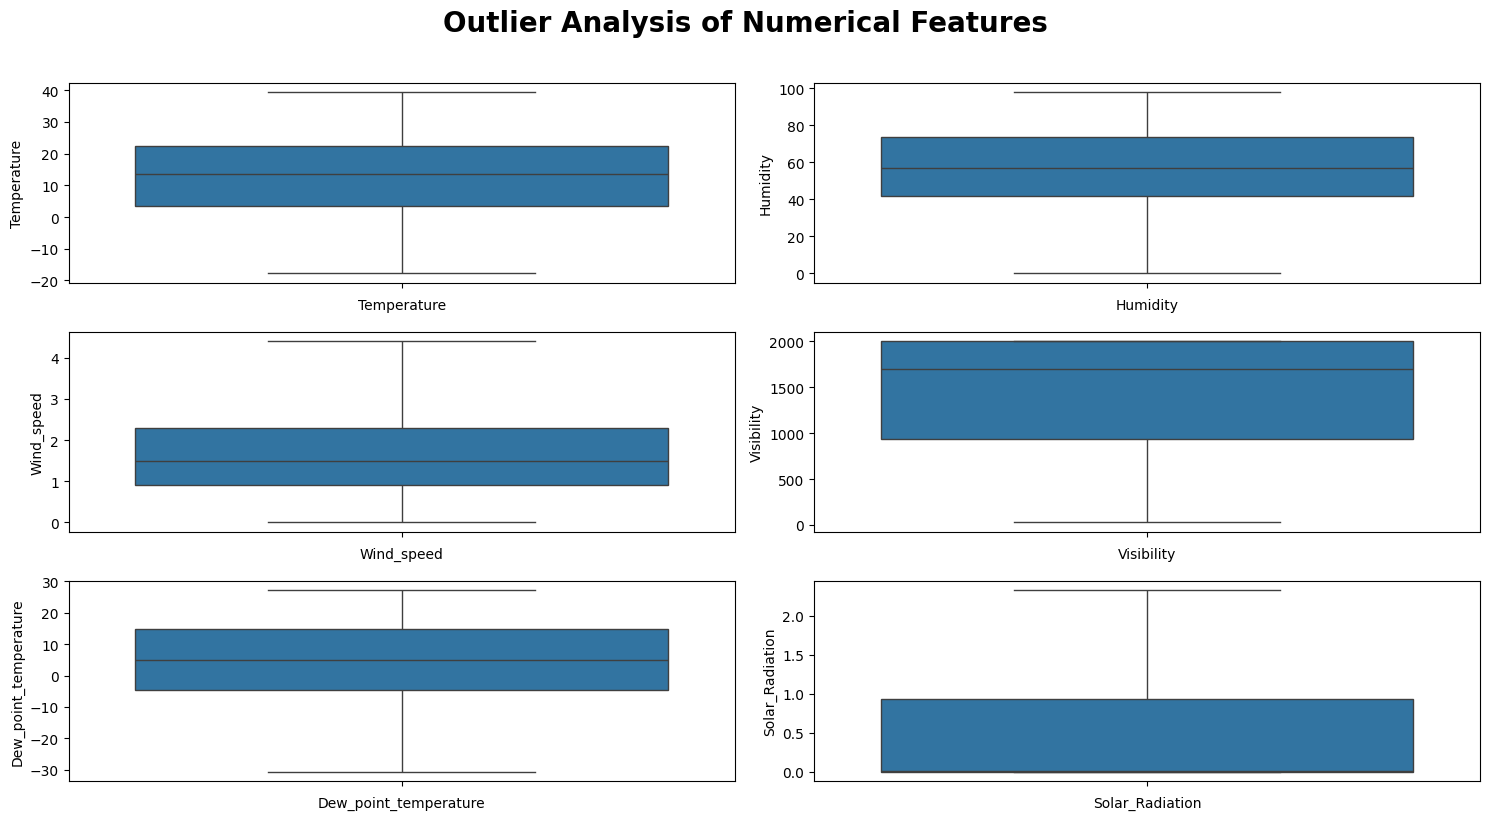

In [70]:
# checking the boxplot after outlier treatment
plt.figure(figsize=(15,8))#defining the size of plot
plt.suptitle('Outlier Analysis of Numerical Features', fontsize=20, fontweight='bold', y=1.02)# assigning title of the graph

for i,col in enumerate(num_features):
  # subplot of 3 rows and 2 columns
  plt.subplot(3, 2, i+1)

  #creates box plot
  sns.boxplot(new_df[col])
  plt.xlabel(col) # assigning x-axis label
  plt.tight_layout()

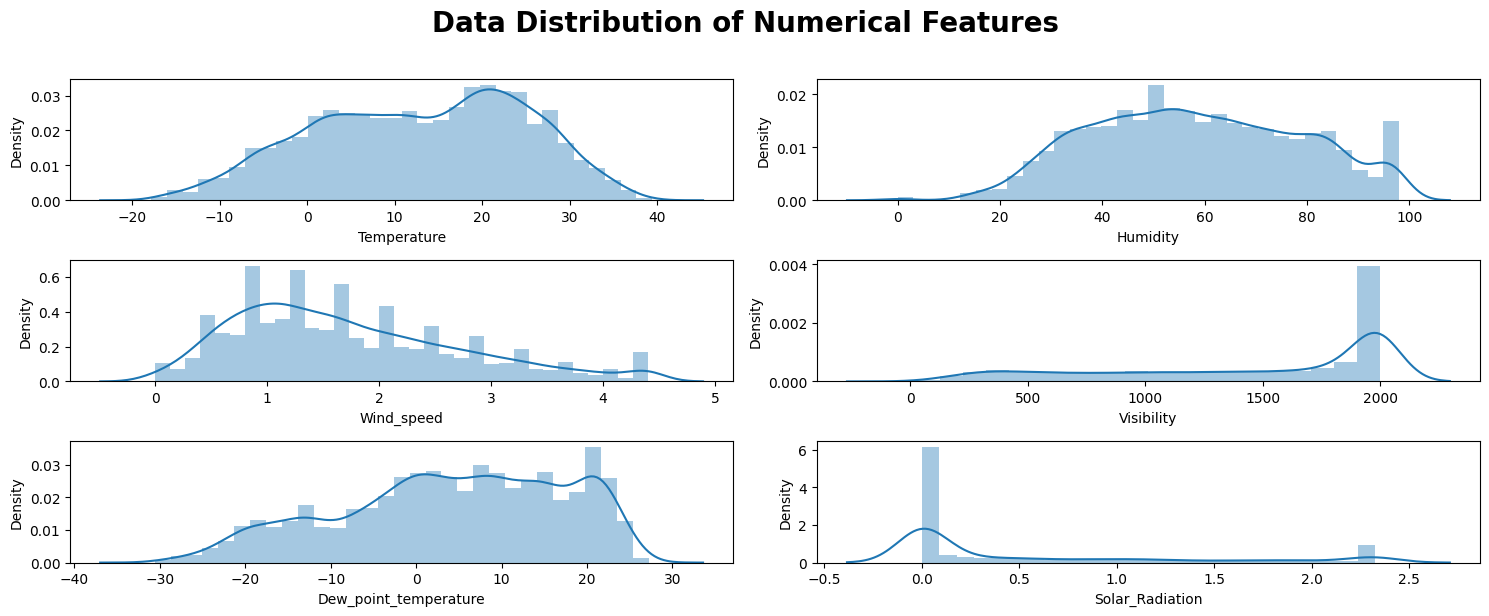

In [71]:
# checking for distribution after treating outliers.
plt.figure(figsize=(15,6))#defining the size of plot
plt.suptitle('Data Distribution of Numerical Features', fontsize=20, fontweight='bold', y=1.02)# assigning title of the graph

for i,col in enumerate(num_features):
  # subplots 3 rows, 2 columns
  plt.subplot(3, 2, i+1)

  # dist plots
  sns.distplot(new_df[col])
  plt.xlabel(col)# assigning x-axis label
  plt.tight_layout()

After addressing outliers, notable shifts in the data distribution become apparent. Prior to outlier treatment, certain features exhibited skewness; however, post-treatment, these features tend to approximate a normal distribution. Consequently, there is no need to employ numerical feature transformation techniques, as the data distribution aligns closely with the expected normal distribution after outlier handling.

###Feature Engineering

Feature engineering is the process of transforming raw data into a set of meaningful, informative, and predictive features that can be used to train machine learning models. It involves selecting, creating, or modifying features in the dataset to enhance the performance and effectiveness of the models.


Feature engineering is a critical step in machine learning because the quality and relevance of features can significantly impact the model's performance. Well-engineered features can help capture relevant patterns, relationships, and structures in the data, enabling the model to make accurate predictions or classifications

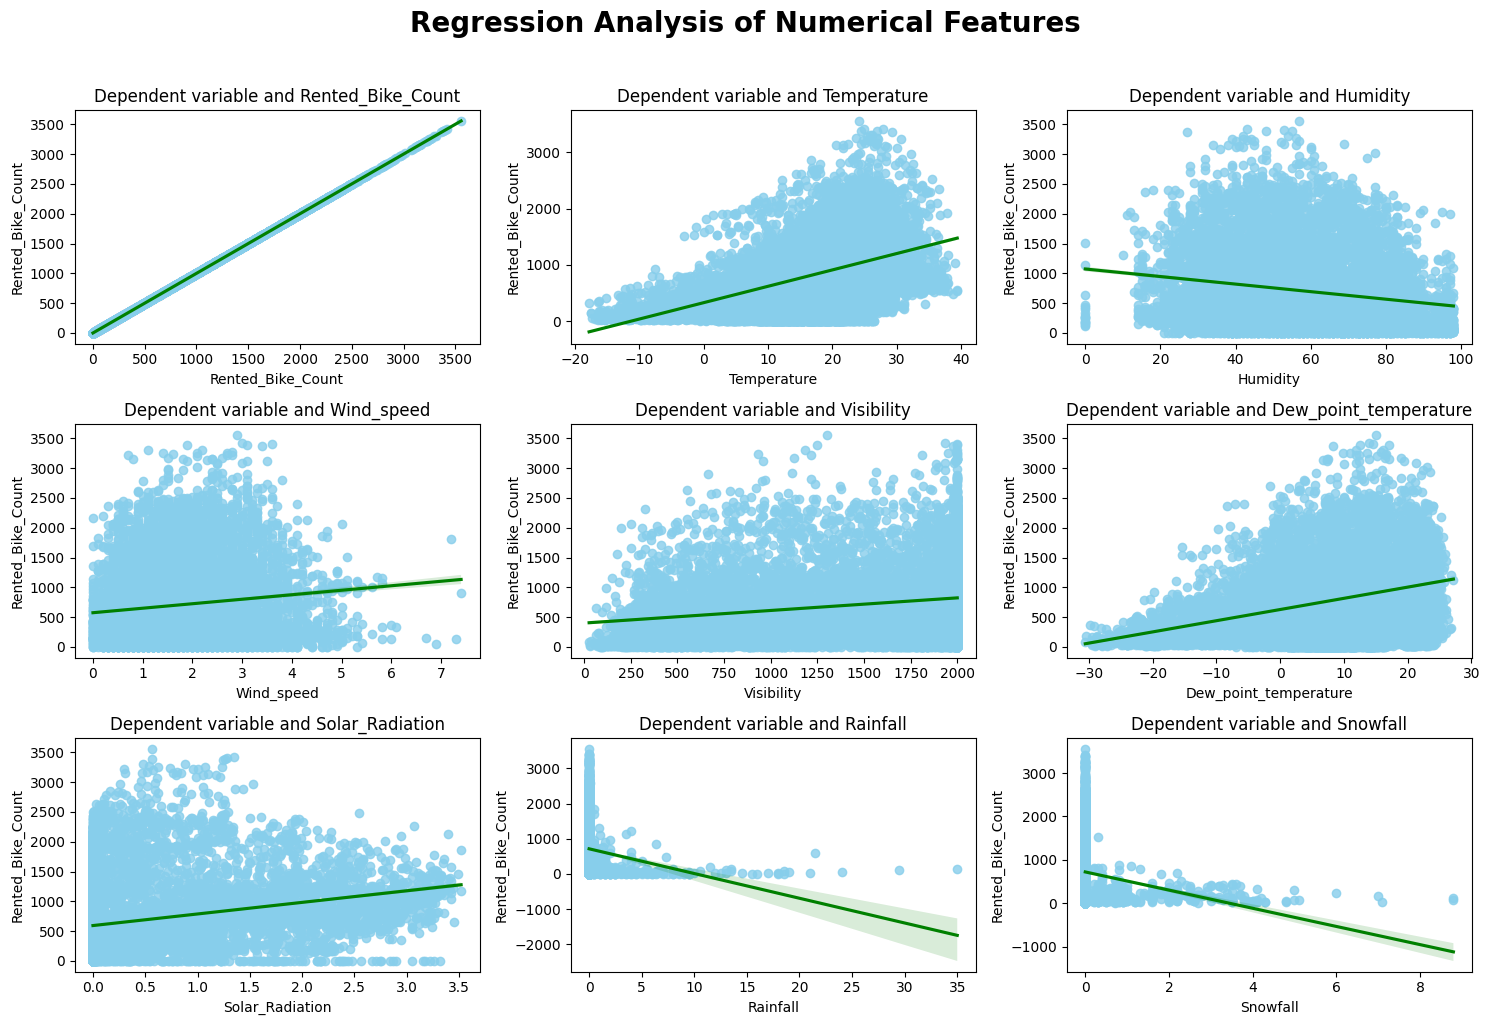

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))

# Title
plt.suptitle('Regression Analysis of Numerical Features', fontsize=20, fontweight='bold', y=1.02)

for i, col in enumerate(numerical_features):
    # Subplots of 3 rows and 3 columns
    plt.subplot(3, 3, i+1)

    # Regression plots
    sns.regplot(x=Bike_df[col], y=Bike_df['Rented_Bike_Count'], scatter_kws={"color": "skyblue"}, line_kws={"color": "green"})

    plt.title(f'Dependent variable and {col}')
    plt.tight_layout()

plt.show()


Most of the numerical features are positively correlated to our target variable.

**Correlation Coefficient**

The correlation coefficient is a statistical metric that assesses the strength and direction of the linear relationship between two variables, offering insight into their level of association.

Denoted as "r," the correlation coefficient ranges from -1 to 1. A value of 1 signifies a perfect positive linear relationship, where variables increase or decrease together with a consistent slope. Conversely, a value of -1 indicates a perfect negative linear relationship, where variables move in opposite directions with a constant slope.

A correlation coefficient of 0 suggests no linear relationship between the variables.

Calculation of the correlation coefficient involves dividing the covariance between the variables by the product of their standard deviations.

While the correlation coefficient offers valuable insight into linear relationships, it is limited to capturing only such associations and may not encompass nonlinear or intricate dependencies between variables.

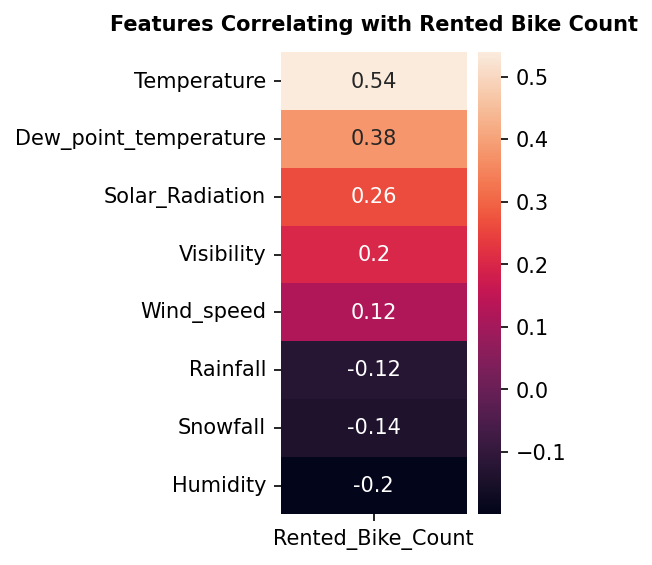

In [73]:
# Selecting only numeric columns
numeric_cols = Bike_df.select_dtypes(include='number')

# Compute correlation matrix
corr_matrix = numeric_cols.corr()

# Create heatmap
plt.figure(figsize=(2, 4), dpi=150) #defining the size of plot
sns.heatmap(corr_matrix[['Rented_Bike_Count']].sort_values(by="Rented_Bike_Count", ascending=False)[1:], annot=True) #creates the heat map
plt.title('Features Correlating with Rented Bike Count', fontsize=10, fontweight='bold', y=1.02) #assigning the title of the map
plt.show()


**Observations**

Based on the heatmap, it's evident that the columns Temperature and Dew Point Temperature exhibit a strong correlation. Given that the correlation between Temperature and the target variable "Bike Rented Count" is higher than that of Dew Point Temperature, we will retain the Temperature column and drop the Dew Point Temperature column.

In [74]:
# droping Dew point temperature column due to multi-collinearity

new_df.drop('Dew_point_temperature', axis=1, inplace=True)

# VIF

VIF, which stands for Variance Inflation Factor, is a measure used in regression analysis to assess multicollinearity among predictor variables.
Multicollinearity occurs when predictor variables in a regression model are highly correlated with each other, which can cause issues in interpreting the individual effects of the variables and can lead to unstable and unreliable model estimates.
The VIF quantifies the extent to which the variance of the estimated regression coefficient is inflated due to multicollinearity.
It measures how much the variance of a particular predictor variable's estimated coefficient is increased compared to if that variable were uncorrelated with the other predictor variables in the model.
Interpreting VIF values:

A VIF of 1 indicates no multicollinearity, meaning the predictor variable is not correlated with the other predictors.
A VIF greater than 1 suggests some degree of multicollinearity, where higher values indicate stronger correlation with other predictors.
A commonly used threshold is a VIF value of 5 or 10. Variables with VIF values exceeding these thresholds are considered to have high multicollinearity and may need to be addressed.
By examining VIF values, researchers can identify predictor variables that contribute to multicollinearity and take appropriate actions, such as removing highly correlated variables, combining variables, or gathering additional data to mitigate the multicollinearity issue.

In [75]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# function to calculate Multicollinearity

def calculate_vif(X):

  # For each X, calculate VIF and save in dataframe
  vif = pd.DataFrame()
  vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
  vif["features"] = X.columns

  return vif

In [76]:
# multicollinearity result

calculate_vif(new_df[[i for i in new_df.describe().columns if i not in ['Rented_Bike_Count','Date']]])

VIF Factor         features
0    3.155378      Temperature
1    4.774929         Humidity
2    4.252654       Wind_speed
3    4.446309       Visibility
4    2.319736  Solar_Radiation
5    1.078541         Rainfall
6    1.118709         Snowfall

Our final set of numerical variables, as mentioned above, will be utilized for our forthcoming model construction.

#  Encoding
Encoding refers to the process of converting categorical variables into numerical representations that can be understood and processed by machine learning algorithms. Since many machine learning algorithms require numerical inputs, encoding categorical variables becomes necessary.

In [77]:
# Check Unique Values for each categorical variable.
for i in categorical_features:
  print("Number of unique values in", i, "is" , new_df[i].nunique())

Number of unique values in Seasons is 4
Number of unique values in Holiday is 2
Number of unique values in Functioning_Day is 2


In [78]:
new_df.head()

Rented_Bike_Count Hour  Temperature  Humidity  Wind_speed  Visibility  \
0                254    0         -5.2        37         2.2        2000   
1                204    1         -5.5        38         0.8        2000   
2                173    2         -6.0        39         1.0        2000   
3                107    3         -6.2        40         0.9        2000   
4                 78    4         -6.0        36         2.3        2000   

   Solar_Radiation  Rainfall  Snowfall Seasons     Holiday Functioning_Day  \
0              0.0       0.0       0.0  Winter  No Holiday             Yes   
1              0.0       0.0       0.0  Winter  No Holiday             Yes   
2              0.0       0.0       0.0  Winter  No Holiday             Yes   
3              0.0       0.0       0.0  Winter  No Holiday             Yes   
4              0.0       0.0       0.0  Winter  No Holiday             Yes   

  month weekdays_weekend  
0    12                0  
1    12                0  
2    12                0  
3    12                0  
4    12                0

We will use one hot encoding for Seasons and Numeric encoding for Holiday and Functioning day.

In [79]:
ab = new_df.copy()
ab =pd.get_dummies(ab, columns=['Seasons'],prefix='Seasons',drop_first=True)

In [80]:
new_df = pd.get_dummies(new_df, columns = ['Seasons'], prefix='Seasons', drop_first = True)

In [81]:
# Numerical Encoding for holiday and functioning_day

new_df['Holiday'] = new_df['Holiday'].map({'Holiday': 1, 'No Holiday': 0})

new_df['Functioning_Day'] = new_df['Functioning_Day'].map({'Yes': 1, 'No': 0})

In [82]:
# Mapping for 'Weekday'
weekdays_weekend_mapping = {
    "Monday": 0,
    "Tuesday": 1,
    "Wednesday": 2,
    "Thursday": 3,
    "Friday": 4,
    "Saturday": 5,
    "Sunday": 6,
}

# Apply mapping using the replace() method to the 'Weekday' column
new_df['weekdays_weekend'] = new_df['weekdays_weekend'].replace(weekdays_weekend_mapping)

# Mapping for 'Month'
month_mapping = {
    "January": 1,
    "February": 2,
    "March": 3,
    "April": 4,
    "May": 5,
    "June": 6,
    "July": 7,
    "August": 8,
    "September": 9,
    "October": 10,
    "November": 11,
    "December": 12,
}

# Apply mapping using the replace() method
new_df['month'] = new_df['month'].replace(month_mapping)


In [83]:
new_df

Rented_Bike_Count Hour  Temperature  Humidity  Wind_speed  Visibility  \
0                   254    0         -5.2        37         2.2        2000   
1                   204    1         -5.5        38         0.8        2000   
2                   173    2         -6.0        39         1.0        2000   
3                   107    3         -6.2        40         0.9        2000   
4                    78    4         -6.0        36         2.3        2000   
...                 ...  ...          ...       ...         ...         ...   
8755               1003   19          4.2        34         2.6        1894   
8756                764   20          3.4        37         2.3        2000   
8757                694   21          2.6        39         0.3        1968   
8758                712   22          2.1        41         1.0        1859   
8759                584   23          1.9        43         1.3        1909   

      Solar_Radiation  Rainfall  Snowfall  Holiday  Functioning_Day month  \
0                 0.0       0.0       0.0        0                1    12   
1                 0.0       0.0       0.0        0                1    12   
2                 0.0       0.0       0.0        0                1    12   
3                 0.0       0.0       0.0        0                1    12   
4                 0.0       0.0       0.0        0                1    12   
...               ...       ...       ...      ...              ...   ...   
8755              0.0       0.0       0.0        0                1    11   
8756              0.0       0.0       0.0        0                1    11   
8757              0.0       0.0       0.0        0                1    11   
8758              0.0       0.0       0.0        0                1    11   
8759              0.0       0.0       0.0        0                1    11   

     weekdays_weekend  Seasons_Spring  Seasons_Summer  Seasons_Winter  
0                   0           False           False            True  
1                   0           False           False            True  
2                   0           False           False            True  
3                   0           False           False            True  
4                   0           False           False            True  
...               ...             ...             ...             ...  
8755                0           False           False           False  
8756                0           False           False           False  
8757                0           False           False           False  
8758                0           False           False           False  
8759                0           False           False           False  

[8760 rows x 16 columns]

##Normalization of the target variable

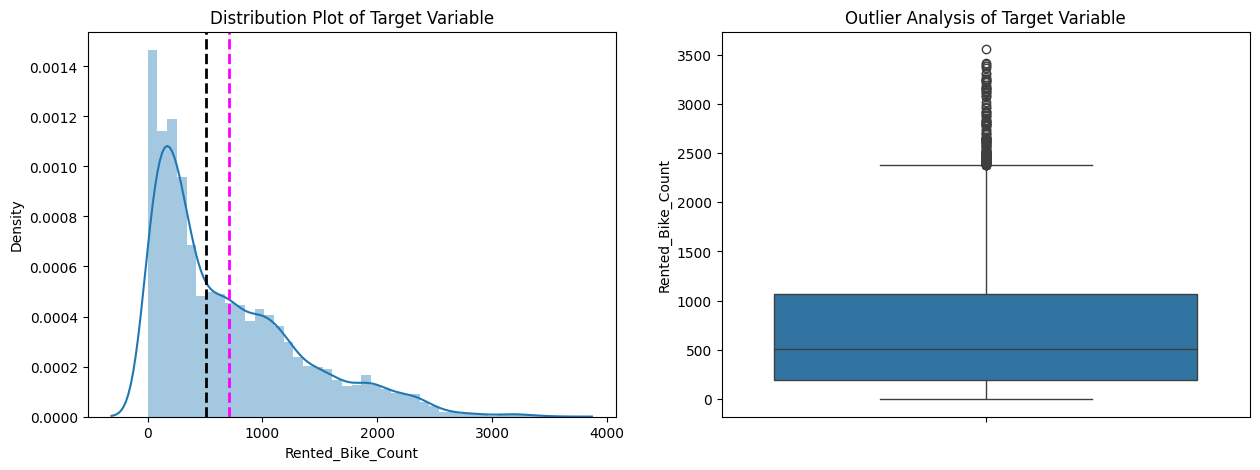

In [84]:
fig, ax = plt.subplots(1,2 , figsize = (15,5))

# Distribution plot of Rented Bike Count
dist =sns.distplot(new_df['Rented_Bike_Count'],hist=True, ax = ax[0])
dist.set(xlabel = 'Rented_Bike_Count', ylabel ='Density', title = 'Distribution Plot of Target Variable')

# mean line
dist.axvline(new_df['Rented_Bike_Count'].mean(), color='magenta', linestyle='dashed', linewidth=2)
# median line
dist.axvline(new_df['Rented_Bike_Count'].median(), color='black', linestyle='dashed', linewidth=2)

# Boxplot
box = sns.boxplot(new_df['Rented_Bike_Count'], ax= ax[1])
box.set(title = 'Outlier Analysis of Target Variable')
plt.show()

**Observation:**
The above graph illustrates that the Rented Bike Count exhibits a moderate right skewness. Linear regression assumes a normally distributed dependent variable; hence, to satisfy this assumption, normalization measures are necessary.

The boxplot above reveals outliers in the Rented Bike Count column.

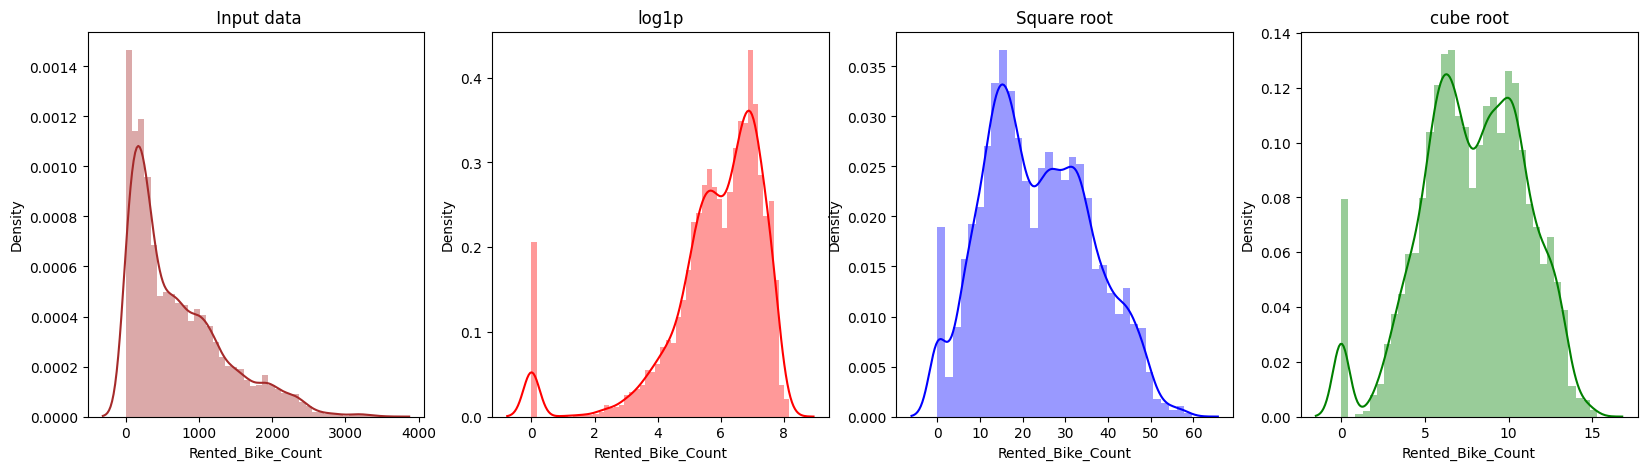

In [85]:
# Transform Your data
#apply different tranformation technique and checking data distribution
fig,axes = plt.subplots(1,4,figsize=(20,5))
sns.distplot((new_df['Rented_Bike_Count']),ax=axes[0],color='brown').set_title(" Input data");

# here we use log10
#transform only posible in positive value and >0 value so add 0.0000001 in data
sns.distplot(np.log1p(new_df['Rented_Bike_Count']),ax=axes[1],color='red').set_title("log1p");

# here we use square root
sns.distplot(np.sqrt(new_df['Rented_Bike_Count']),ax=axes[2], color='blue').set_title("Square root");

# here we use cube root
sns.distplot(np.cbrt(new_df['Rented_Bike_Count']),ax=axes[3], color='green').set_title("cube root");

**Observations:**

While applying a logarithmic transformation to the dependent variable didn't yield significant improvement, as it led to a negatively skewed distribution.

With the attempts of square root and cube root transformations also failed to achieve a normally distributed variable.

Consequently, opting for a square root transformation for the regression proved beneficial, as it successfully rendered the variable into a well-distributed form.

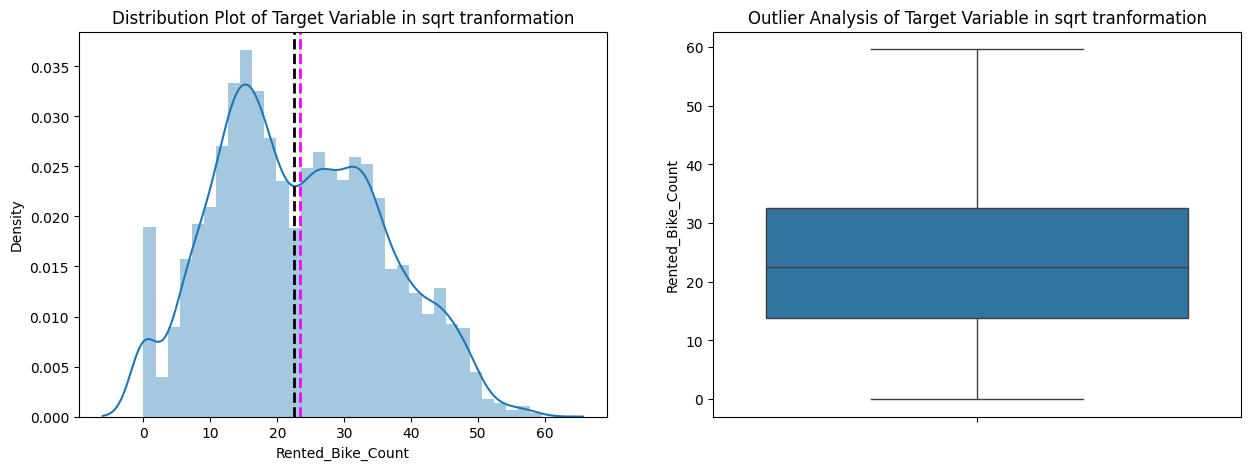

In [86]:
fig, ax = plt.subplots(1,2 , figsize = (15,5))

#  checking square root tranformation in our target variable
dist =sns.distplot(np.sqrt(new_df['Rented_Bike_Count']), ax = ax[0])
dist.set(xlabel = 'Rented_Bike_Count', ylabel ='Density', title = 'Distribution Plot of Target Variable in sqrt tranformation')

# mean line
dist.axvline(np.sqrt(new_df['Rented_Bike_Count']).mean(), color='magenta', linestyle='dashed', linewidth=2)
# median line
dist.axvline(np.sqrt(new_df['Rented_Bike_Count']).median(), color='black', linestyle='dashed', linewidth=2)

# Boxplot
box = sns.boxplot(np.sqrt(new_df['Rented_Bike_Count']), ax= ax[1])
box.set(title = 'Outlier Analysis of Target Variable in sqrt tranformation')
plt.show()

**Observation:**

After applying the square root transformation to the skewed Rented Bike Count, we successfully achieved a distribution that closely resembles a normal distribution. This transformation aligns with the conventional practice of normalizing skewed variables for linear regression analysis. Moreover, upon examination, we discovered the absence of outliers within the Rented Bike Count column post-transformation.

In [87]:
# applying square root on Rented_Bike_Count
new_df['Rented_Bike_Count']=np.sqrt(new_df['Rented_Bike_Count'])

In [88]:
new_df['Hour']=new_df['Hour'].astype('int64')

##Data Manipulations Performed and Insights Uncovered
I examined the correlation coefficients and observed that most of the numerical features exhibit a positive correlation with our target variable. Upon analyzing the heatmap and correlation coefficients, it became apparent that 'Dew_point_temperature' and 'Temperature' are strongly correlated, with a coefficient of 0.91. However, 'Dew_point_temperature' showed a lower correlation with our target variable, leading us to drop it from further analysis. Additionally, a VIF analysis revealed that the 'year' feature exhibited significant multicollinearity, prompting its removal from the dataset to enhance model performance.

For categorical features, appropriate encoding methods were applied to facilitate model comprehension. 'Seasons' underwent one-hot encoding, while 'Holiday', 'Functioning_Day', 'Day', and 'month' were numerically encoded.

In addressing the distribution of the target variable, logarithmic transformation did not yield significant improvement, resulting in a negatively skewed distribution. Subsequent attempts with square root and cube root transformations also failed to normalize the variable. Finally, a square root transformation was selected for regression analysis as it effectively transformed the variable into a more evenly distributed form.

## ***7. ML Model Implementation***

## **Train_test_split**

In [89]:
# diving the input feature and target variable
X = new_df.drop('Rented_Bike_Count', axis=1)   # input_features
y= new_df['Rented_Bike_Count'] # target_column

In [90]:
# dividing the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

print(X_train.shape)
print(X_test.shape)

(7008, 15)
(1752, 15)


# Scaling the input features

In [91]:
# Scaling Data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Evaluation Metrics Used -**

**The mean squared error (MSE):-** It tells you how close a regression line is to a set of points.

**Root Mean Square Error (RMSE):-** It is the standard deviation of the residuals (prediction errors).

**Mean Absolute Error (MAE):-** These are metrics used to evaluate a Regression Model. ... Here, errors are the absolute differences between the predicted values (values predicted by our regression model) and the actual values of a variable.

**R-squared (R2):-** It is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

**Adjusted R-squared:-** It is a modified version of R-squared that has been adjusted for the number of predictors in the model.

# **Model training**

In [92]:
# empty list for appending performance metric score
model_result = []

def predict(ml_model,model_name):

  '''
  Pass the model and predict value.
  Function will calculate all the evaluation metrics and appending those metrics score on model_result list.
  Plotting different graphs for test data.
  '''

  # model fitting
  model = ml_model.fit(X_train,y_train)

  # predicting values
  y_train_pred = model.predict(X_train)
  y_test_pred = model.predict(X_test)

  # Reverse the transformation on the predictions    (In case if we need y_train_pred in original and transformed way)
  y_train_pred_original = np.power(y_train_pred, 2)
  y_test_pred_original = np.power(y_test_pred, 2)

    # graph --> best fit line on test data
  sns.regplot(x=y_test_pred, y=y_test, line_kws={'color':'red'})
  plt.xlabel('Predicted')
  plt.ylabel('Actual')

  '''Evaluation metrics on train data'''
  train_MSE  = round(mean_squared_error(y_train, y_train_pred),3)
  train_RMSE = round(np.sqrt(train_MSE),3)
  train_r2 = round(r2_score(y_train, y_train_pred),3)
  train_MAE = round(mean_absolute_error(y_train, y_train_pred),3)
  train_adj_r2 = round(1-(1-r2_score(y_train, y_train_pred))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)),3)
  print(f'train MSE : {train_MSE}')
  print(f'train RMSE : {train_RMSE}')
  print(f'train MAE : {train_MAE}')
  print(f'train R2 : {train_r2}')
  print(f'train Adj R2 : {train_adj_r2}')
  print('-'*150)

  '''Evaluation metrics on test data'''
  test_MSE  = round(mean_squared_error(y_test, y_test_pred),3)
  test_RMSE = round(np.sqrt(test_MSE),3)
  test_r2 = round(r2_score(y_test, y_test_pred),3)
  test_MAE = round(mean_absolute_error(y_test, y_test_pred),3)
  test_adj_r2 = round(1-(1-r2_score(y_test, y_test_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)),3)
  print(f'test MSE : {test_MSE}')
  print(f'test RMSE : {test_RMSE}')
  print(f'test MAE : {test_MAE}')
  print(f'test R2 : {test_r2}')
  print(f'test Adj R2 : {test_adj_r2}')
  print('-'*150)

   # graph --> actual vs predicted on test data
  plt.figure(figsize=(6,5))
  plt.plot((y_test_pred)[:20])
  plt.plot(np.array((y_test)[:20]))
  plt.legend(["Predicted","Actual"])
  plt.xlabel('Test Data on last 20 points')
  plt.show()
  print('-'*150)

  '''actual vs predicted value on test data'''
  d = {'y_actual':y_test, 'y_predict':y_test_pred, 'error':y_test-y_test_pred}
  print(pd.DataFrame(data=d).head().T)
  print('-'*150)

  # using the score from the performance metrics to create the final model_result.
  model_result.append({'model':model_name,
                       'train MSE':train_MSE,
                       'test MSE':test_MSE,
                       'train RMSE':train_RMSE,
                       'test RMSE':test_RMSE,
                       'train MAE':train_MAE,
                       'test MAE':test_MAE,
                       'train R2':train_r2,
                       'test R2':test_r2,
                       'train Adj R2':train_adj_r2,
                       'test Adj R2':test_adj_r2})

# **Model implementation**

# **Linear regression**

train MSE : 53.422
train RMSE : 7.309
train MAE : 5.628
train R2 : 0.658
train Adj R2 : 0.657
------------------------------------------------------------------------------------------------------------------------------------------------------
test MSE : 52.947
test RMSE : 7.276
test MAE : 5.629
test R2 : 0.649
test Adj R2 : 0.646
------------------------------------------------------------------------------------------------------------------------------------------------------


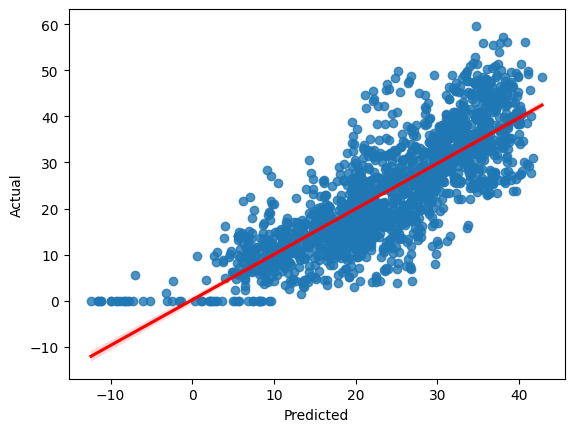

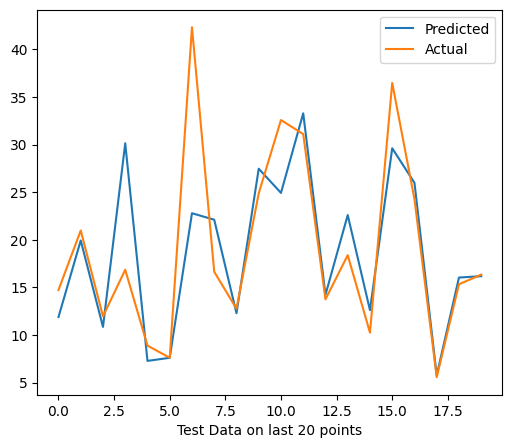

------------------------------------------------------------------------------------------------------------------------------------------------------
                1425       7993       897        5813      1708
y_actual   14.730920  20.976177  11.958261  16.852300  8.888194
y_predict  11.889325  19.927692  10.848455  30.134462  7.282486
error       2.841595   1.048485   1.109806 -13.282162  1.605709
------------------------------------------------------------------------------------------------------------------------------------------------------


In [93]:
predict(LinearRegression(), 'LinearRegression')

# **Lasso**

train MSE : 53.709
train RMSE : 7.329
train MAE : 5.649
train R2 : 0.656
train Adj R2 : 0.655
------------------------------------------------------------------------------------------------------------------------------------------------------
test MSE : 53.635
test RMSE : 7.324
test MAE : 5.673
test R2 : 0.644
test Adj R2 : 0.641
------------------------------------------------------------------------------------------------------------------------------------------------------


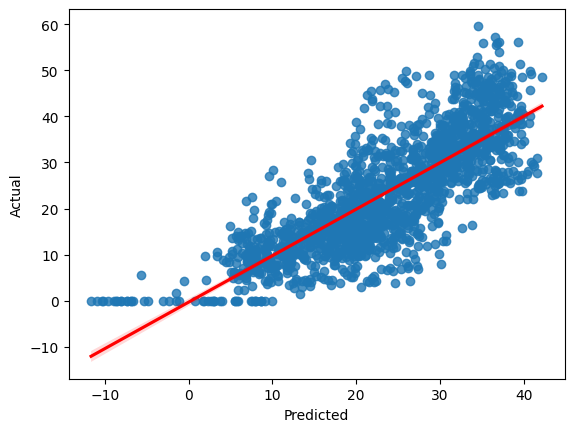

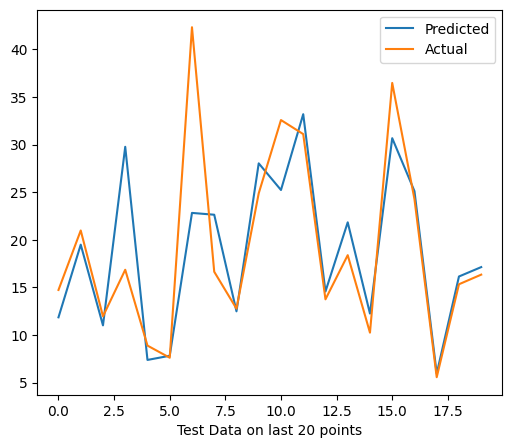

------------------------------------------------------------------------------------------------------------------------------------------------------
                1425       7993       897        5813      1708
y_actual   14.730920  20.976177  11.958261  16.852300  8.888194
y_predict  11.857793  19.487381  11.012147  29.764215  7.382850
error       2.873127   1.488796   0.946114 -12.911915  1.505344
------------------------------------------------------------------------------------------------------------------------------------------------------


In [94]:
predict(Lasso(alpha=0.1, max_iter=1000), 'Lasso')

# **Ridge**

train MSE : 53.422
train RMSE : 7.309
train MAE : 5.628
train R2 : 0.658
train Adj R2 : 0.657
------------------------------------------------------------------------------------------------------------------------------------------------------
test MSE : 52.947
test RMSE : 7.276
test MAE : 5.629
test R2 : 0.649
test Adj R2 : 0.646
------------------------------------------------------------------------------------------------------------------------------------------------------


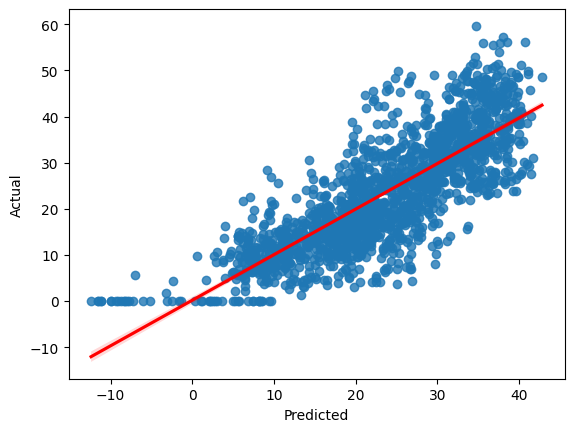

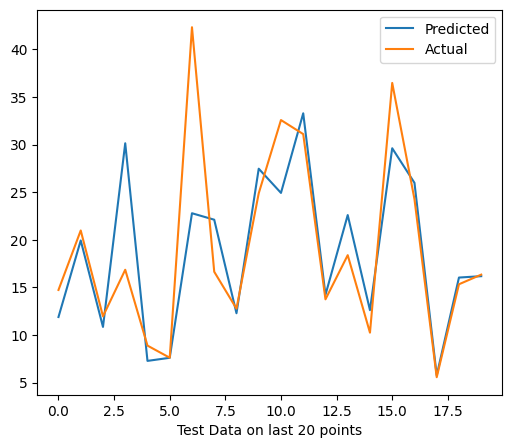

------------------------------------------------------------------------------------------------------------------------------------------------------
                1425       7993       897        5813      1708
y_actual   14.730920  20.976177  11.958261  16.852300  8.888194
y_predict  11.889449  19.927708  10.848498  30.134314  7.282452
error       2.841471   1.048469   1.109763 -13.282014  1.605743
------------------------------------------------------------------------------------------------------------------------------------------------------


In [95]:
predict(Ridge(alpha=0.1, max_iter=1000), 'Ridge')

# **K - nearest neighbor**

train MSE : 10.925
train RMSE : 3.305
train MAE : 2.205
train R2 : 0.93
train Adj R2 : 0.93
------------------------------------------------------------------------------------------------------------------------------------------------------
test MSE : 25.234
test RMSE : 5.023
test MAE : 3.445
test R2 : 0.833
test Adj R2 : 0.831
------------------------------------------------------------------------------------------------------------------------------------------------------


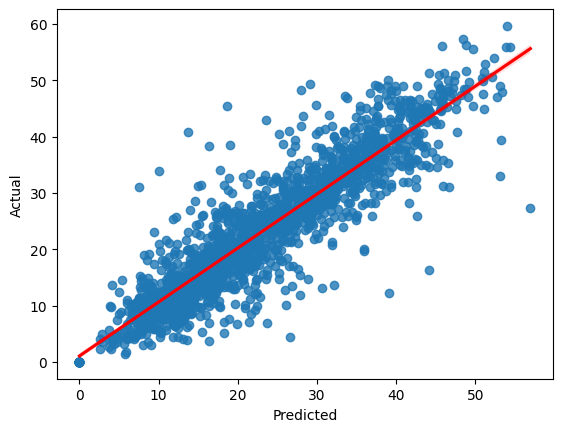

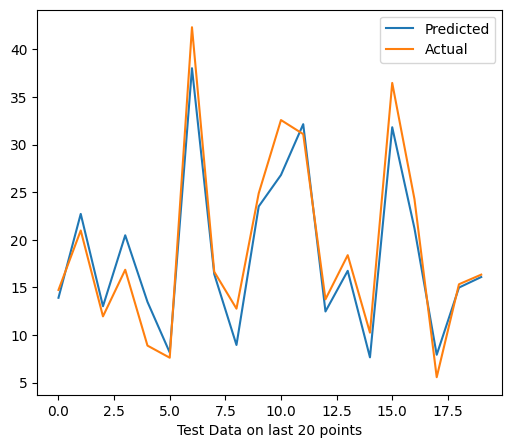

------------------------------------------------------------------------------------------------------------------------------------------------------
                1425       7993       897        5813       1708
y_actual   14.730920  20.976177  11.958261  16.852300   8.888194
y_predict  13.909242  22.716903  13.021459  20.472258  13.478800
error       0.821678  -1.740726  -1.063198  -3.619959  -4.590605
------------------------------------------------------------------------------------------------------------------------------------------------------


In [96]:
predict(KNeighborsRegressor(n_neighbors=3),'KNN')

# **Support vector machine**

train MSE : 16.682
train RMSE : 4.084
train MAE : 2.44
train R2 : 0.893
train Adj R2 : 0.893
------------------------------------------------------------------------------------------------------------------------------------------------------
test MSE : 21.63
test RMSE : 4.651
test MAE : 3.017
test R2 : 0.857
test Adj R2 : 0.855
------------------------------------------------------------------------------------------------------------------------------------------------------


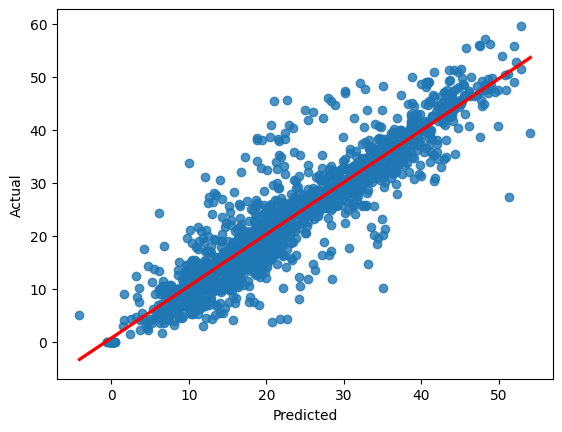

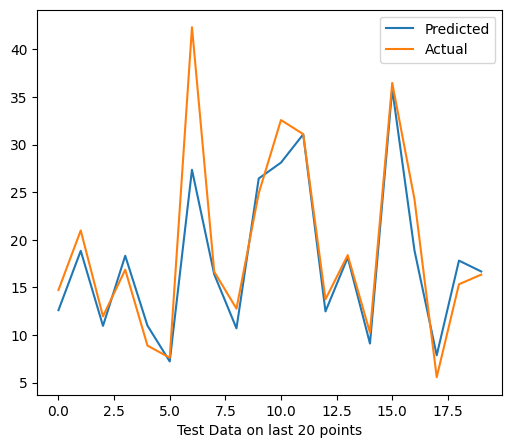

------------------------------------------------------------------------------------------------------------------------------------------------------
                1425       7993       897        5813       1708
y_actual   14.730920  20.976177  11.958261  16.852300   8.888194
y_predict  12.611242  18.842768  10.959561  18.319187  10.982259
error       2.119678   2.133409   0.998700  -1.466887  -2.094065
------------------------------------------------------------------------------------------------------------------------------------------------------


In [97]:
predict(SVR(kernel='rbf',C=100), 'SVM')

# **Decision tree**

train MSE : 13.266
train RMSE : 3.642
train MAE : 2.464
train R2 : 0.915
train Adj R2 : 0.915
------------------------------------------------------------------------------------------------------------------------------------------------------
test MSE : 18.395
test RMSE : 4.289
test MAE : 2.906
test R2 : 0.878
test Adj R2 : 0.877
------------------------------------------------------------------------------------------------------------------------------------------------------


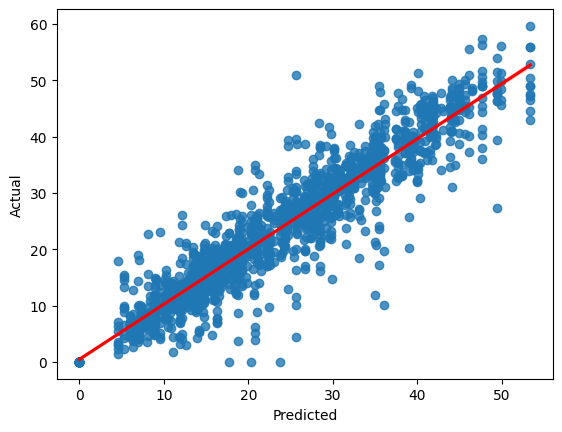

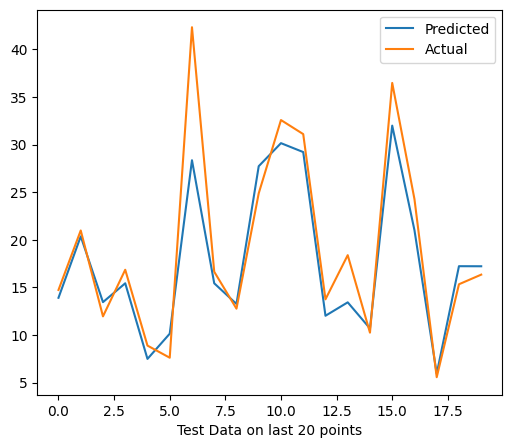

------------------------------------------------------------------------------------------------------------------------------------------------------
                1425       7993       897        5813      1708
y_actual   14.730920  20.976177  11.958261  16.852300  8.888194
y_predict  13.907997  20.356872  13.452619  15.430529  7.490911
error       0.822923   0.619305  -1.494358   1.421771  1.397284
------------------------------------------------------------------------------------------------------------------------------------------------------


In [98]:
predict(DecisionTreeRegressor(min_samples_leaf=20, min_samples_split=3,max_depth=20, random_state=33), 'Decision Tree')

# **Random Forest**

**Hyperparameter tunning using grid searchcv**

In [99]:
param_grid = {'n_estimators': [50,80],       # number of trees in the ensemble
             'max_depth': [15,20],           # maximum number of levels allowed in each tree.
             'min_samples_split': [5,15],    # minimum number of samples necessary in a node to cause node splitting.
             'min_samples_leaf': [3,5]}      # minimum number of samples which can be stored in a tree leaf.


# Initialize the RandomForestRegressor model
rf = RandomForestRegressor()

# Use GridSearchCV to perform a grid search over the parameter grid
grid_search = GridSearchCV(rf, param_grid=param_grid, cv=5, scoring='r2')

# Fit the model to the training data
grid_search.fit(X, y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [15, 20], 'min_samples_leaf': [3, 5],
                         'min_samples_split': [5, 15],
                         'n_estimators': [50, 80]},
             scoring='r2')

In [100]:
# Get the best parameters from the grid search
rf_optimal_model = grid_search.best_estimator_
rf_optimal_model

RandomForestRegressor(max_depth=20, min_samples_leaf=3, min_samples_split=5,
                      n_estimators=80)

train MSE : 3.446
train RMSE : 1.856
train MAE : 1.149
train R2 : 0.978
train Adj R2 : 0.978
------------------------------------------------------------------------------------------------------------------------------------------------------
test MSE : 10.026
test RMSE : 3.166
test MAE : 2.048
test R2 : 0.934
test Adj R2 : 0.933
------------------------------------------------------------------------------------------------------------------------------------------------------


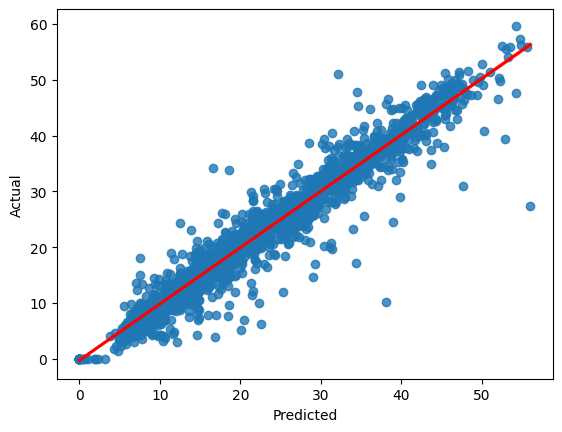

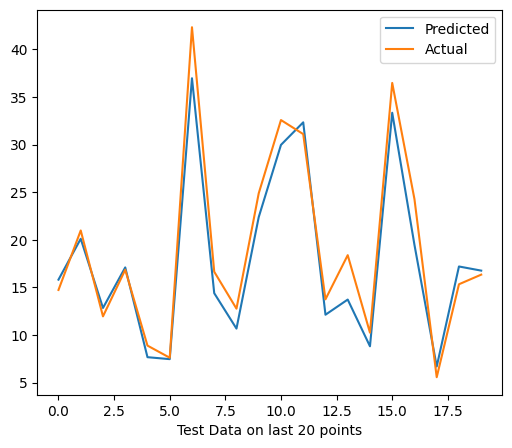

------------------------------------------------------------------------------------------------------------------------------------------------------
                1425       7993       897        5813      1708
y_actual   14.730920  20.976177  11.958261  16.852300  8.888194
y_predict  15.812844  20.105061  12.841788  17.097661  7.671607
error      -1.081925   0.871116  -0.883527  -0.245362  1.216588
------------------------------------------------------------------------------------------------------------------------------------------------------


In [101]:
predict(rf_optimal_model, 'Random Forest')

In [102]:
# feature importance
importances = rf_optimal_model.feature_importances_

# Creating a dictonary
importance_dict = {'Feature' : list(X.columns),
                   'Feature Importance' : importances}

# Creating the dataframe
importance = pd.DataFrame(importance_dict)
sorting_features = importance.sort_values(by=['Feature Importance'],ascending=False)
sorting_features

Feature  Feature Importance
1        Temperature            0.273579
0               Hour            0.257886
9    Functioning_Day            0.172639
6           Rainfall            0.080087
2           Humidity            0.069037
14    Seasons_Winter            0.048872
5    Solar_Radiation            0.032837
11  weekdays_weekend            0.021924
10             month            0.020848
4         Visibility            0.008759
3         Wind_speed            0.007418
8            Holiday            0.002767
7           Snowfall            0.001238
13    Seasons_Summer            0.001221
12    Seasons_Spring            0.000889

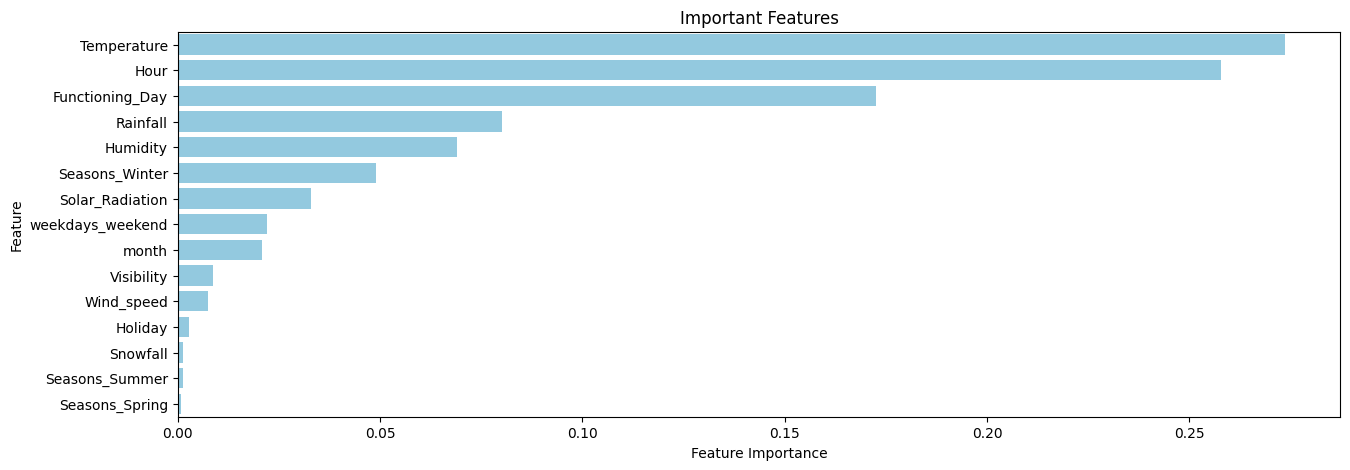

In [103]:
# plotting feature importance graph
plt.figure(figsize=(15,5))
bar = sns.barplot(x='Feature Importance', y='Feature', data=sorting_features, color='skyblue')
bar.set_title('Important Features')
plt.show()

##Important Features in Random Forest


In Random Forest, the five most significant features are temperature, hour, functioning_day, rainfall, and humidity.

# XGBOOST

**Finding best hyperparameter using gridsearchcv**

In [104]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder

# Assuming X contains your features DataFrame
# Let's encode categorical features using OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
X_encoded = encoder.fit_transform(X[['Hour', 'month', 'weekdays_weekend']])

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize XGBoost model with default parameters
xgb = XGBRegressor()

# Fit the model to the training data
xgb.fit(X_train, y_train)

# Predict on the test data
y_pred = xgb.predict(X_test)

# Calculate R^2 score
r2 = r2_score(y_test, y_pred)
print("R^2 score:", r2)


R^2 score: 0.503379530188623


In [105]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Define the preprocessing steps for encoding categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['Hour', 'month', 'weekdays_weekend'])
    ],
    remainder='passthrough'  # Pass through the remaining columns (assuming they are numerical)
)

# Define the XGBoost model
xgb = XGBRegressor()

# Define the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', xgb)])

# Define parameter grid for XGBoost
param_grid = {
    'regressor__n_estimators': [50, 80],           # number of trees in the ensemble
    'regressor__max_depth': [15, 20],               # maximum depth of each tree
    'regressor__min_child_weight': [5, 15],         # minimum sum of instance weight (hessian) needed in a child
    'regressor__gamma': [0, 0.1],                   # minimum loss reduction required to make a further partition on a leaf node of the tree
    'regressor__subsample': [0.8, 1.0],             # fraction of samples used to fit each tree
    'regressor__colsample_bytree': [0.8, 1.0],      # fraction of features used to fit each tree
    'regressor__learning_rate': [0.05, 0.1]         # step size shrinkage used to prevent overfitting
}

# Perform GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5, scoring='r2')
grid_search.fit(X, y)



GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['Hour',
                                                                          'month',
                                                                          'weekdays_weekend'])])),
                                       ('regressor',
                                        XGBRegressor(base_score=None,
                                                     booster=None,
                                                     callbacks=None,
                                                     colsample_bylevel=None,
                                                     colsample_bynode=None,
                                                     colsample_bytree=None,
                                                     device=None...
                                                     multi_strategy=None,
                                                     n_estimators=None,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     random_state=None, ...))]),
             param_grid={'regressor__colsample_bytree': [0.8, 1.0],
                         'regressor__gamma': [0, 0.1],
                         'regressor__learning_rate': [0.05, 0.1],
                         'regressor__max_depth': [15, 20],
                         'regressor__min_child_weight': [5, 15],
                         'regressor__n_estimators': [50, 80],
                         'regressor__subsample': [0.8, 1.0]},
             scoring='r2')

In [106]:
# Get the best parameters from the grid search
xgb_optimal_model = grid_search.best_estimator_
xgb_optimal_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Hour', 'month',
                                                   'weekdays_weekend'])])),
                ('regressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=1.0, device=None,
                              early_stopping_rounds=None,
                              e...
                              feature_types=None, gamma=0.1, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=15, max_leaves=None, min_child_weight=5,
                              missing=nan, monotone_constraints=None,
                              multi_strategy=None, n_estimators=80, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [107]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Get the best XGBoost model from the grid search
xgb_optimal_model = grid_search.best_estimator_

# Make predictions using the optimal XGBoost model
predictions = xgb_optimal_model.predict(X)

# Calculate metrics for the training set
train_mse = mean_squared_error(y, predictions)
train_rmse = mean_squared_error(y, predictions, squared=False)  # Calculate RMSE from MSE
train_mae = mean_absolute_error(y, predictions)
train_r2 = r2_score(y, predictions)

# Print the metrics for the training set
print("Training Metrics:")
print("MSE:", train_mse)
print("RMSE:", train_rmse)
print("MAE:", train_mae)
print("R2 Score:", train_r2)


Training Metrics:
MSE: 0.9064626656396408
RMSE: 0.9520833291470032
MAE: 0.6084609501096179
R2 Score: 0.9941522049053778


In [108]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd

# Assuming X is your feature matrix and y is your target variable
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify categorical and numerical features
categorical_features = ['Hour', 'month', 'weekdays_weekend']  # Assuming these are your categorical features
numerical_features = [col for col in X.columns if col not in categorical_features]

# Define preprocessing steps
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with the most frequent value
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))  # Impute missing values with the mean
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(transformers=[
    ('cat', categorical_transformer, categorical_features),
    ('num', numerical_transformer, numerical_features)
])

# Define the XGBoost model
xgb_model = XGBRegressor()

# Create the full pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', xgb_model)
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the testing data
test_predictions = pipeline.predict(X_test)

# Calculate metrics for the testing set
test_mse = mean_squared_error(y_test, test_predictions)
test_rmse = mean_squared_error(y_test, test_predictions, squared=False)  # Calculate RMSE from MSE
test_mae = mean_absolute_error(y_test, test_predictions)
test_r2 = r2_score(y_test, test_predictions)

# Print the metrics for the testing set
print("Testing Metrics:")
print("MSE:", test_mse)
print("RMSE:", test_rmse)
print("MAE:", test_mae)
print("R2 Score:", test_r2)


Testing Metrics:
MSE: 9.773811185520252
RMSE: 3.1263095153103846
MAE: 2.0730903140705035
R2 Score: 0.9364993003832248


In [109]:
# Assuming 'X' is your pandas DataFrame containing input features
# Assuming 'xgb_optimal_model' is the optimal XGBoost model obtained from grid search

# Make predictions using the optimal XGBoost model
predictions = xgb_optimal_model.predict(X)
predictions
# Now you can use the predictions as needed

array([13.660208, 13.792905, 12.189707, ..., 26.7642  , 27.021791,
       23.376335], dtype=float32)

In [110]:
# converting the model_result list into DataFrame
model_result = pd.DataFrame(model_result)

# sorting the values by test R2 score
model_result.sort_values(by='test R2', ascending=False)

model  train MSE  test MSE  train RMSE  test RMSE  train MAE  \
6     Random Forest      3.446    10.026       1.856      3.166      1.149   
5     Decision Tree     13.266    18.395       3.642      4.289      2.464   
4               SVM     16.682    21.630       4.084      4.651      2.440   
3               KNN     10.925    25.234       3.305      5.023      2.205   
0  LinearRegression     53.422    52.947       7.309      7.276      5.628   
2             Ridge     53.422    52.947       7.309      7.276      5.628   
1             Lasso     53.709    53.635       7.329      7.324      5.649   

   test MAE  train R2  test R2  train Adj R2  test Adj R2  
6     2.048     0.978    0.934         0.978        0.933  
5     2.906     0.915    0.878         0.915        0.877  
4     3.017     0.893    0.857         0.893        0.855  
3     3.445     0.930    0.833         0.930        0.831  
0     5.629     0.658    0.649         0.657        0.646  
2     5.629     0.658    0.649         0.657        0.646  
1     5.673     0.656    0.644         0.655        0.641

In [111]:
import xgboost as xgb
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Assuming X_train is your feature matrix and y_train is your target variable
# Assuming X_train contains categorical features: 'month' and 'weekdays_weekend'

# Define which features are categorical
categorical_features = ['month', 'weekdays_weekend']

# Define the transformer to handle categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features)
    ],
    remainder='passthrough'
)

# Fit and transform the training data
X_train_encoded = preprocessor.fit_transform(X_train)

# Initialize and train the XGBoost model
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', seed=42)
xg_reg.fit(X_train_encoded, y_train)

# Get feature importances
importances = xg_reg.feature_importances_

# Creating a dictionary
importance_dict = {'Feature': preprocessor.get_feature_names_out(),
                   'Feature Importance': importances}

# Creating the dataframe
importance_df = pd.DataFrame(importance_dict)

# Sort the dataframe by feature importance
sorted_importance_df = importance_df.sort_values(by='Feature Importance', ascending=False)

print(sorted_importance_df)


                       Feature  Feature Importance
23  remainder__Functioning_Day            0.376189
26   remainder__Seasons_Winter            0.316679
20         remainder__Rainfall            0.068766
15      remainder__Temperature            0.040621
14             remainder__Hour            0.038571
16         remainder__Humidity            0.016508
24   remainder__Seasons_Spring            0.015976
9                cat__month_10            0.015410
2                 cat__month_3            0.015143
7                 cat__month_8            0.014412
12     cat__weekdays_weekend_0            0.012613
19  remainder__Solar_Radiation            0.012567
22          remainder__Holiday            0.011722
5                 cat__month_6            0.008715
10               cat__month_11            0.007897
6                 cat__month_7            0.005763
21         remainder__Snowfall            0.003981
25   remainder__Seasons_Summer            0.003540
11               cat__month_12 

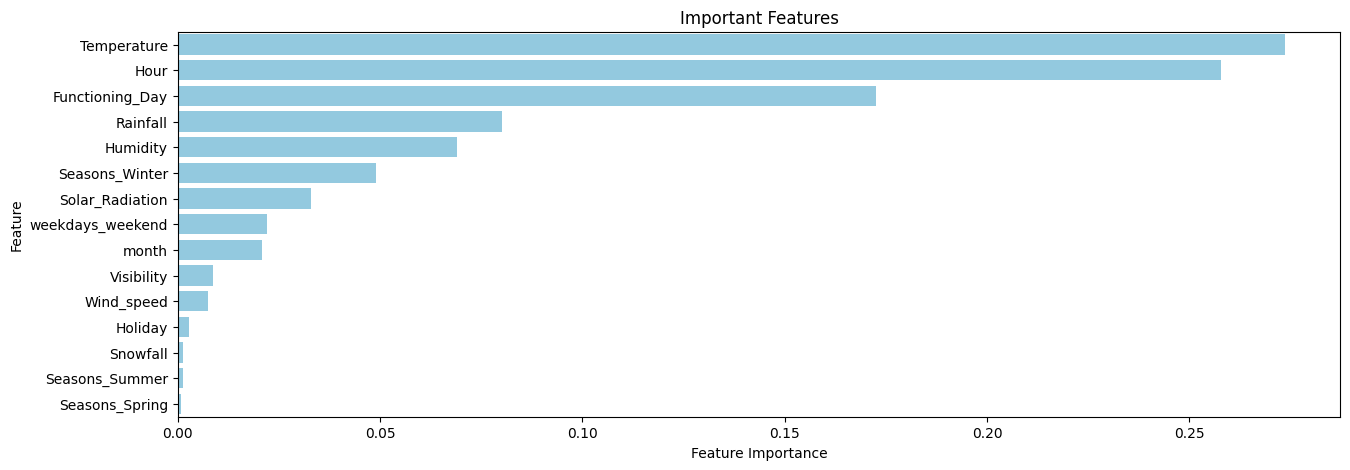

In [112]:
# plotting feature importance graph
plt.figure(figsize=(15,5))
bar = sns.barplot(x='Feature Importance', y='Feature', data=sorting_features, color='skyblue')
bar.set_title('Important Features')
plt.show()


The top five features for XGBoost are Temperature, Hour, Functioning Day, Rainfall, and Humidity.

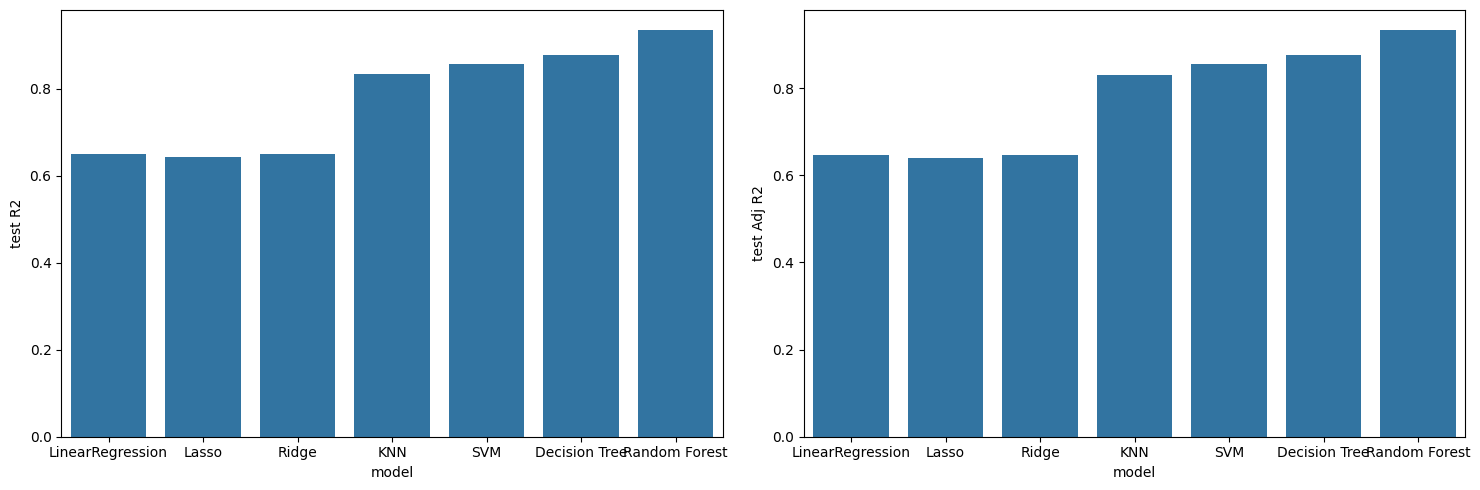

In [113]:
# plotting graph to compare model performance of all the models
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.barplot(x=model_result['model'], y=model_result['test R2'], ax=ax[0])           # Model Vs test R2
sns.barplot(x=model_result['model'], y=model_result['test Adj R2'], ax=ax[1])       # Model Vs test Adj R2
plt.tight_layout()

# **Conclusion**

**Summary**

I initiated my analysis by conducting Exploratory Data Analysis (EDA) on all of our datasets. Initially, I scrutinized and manipulated our target variable, "Rental Bike Count." Subsequently, I explored categorical and numerical variables, unraveling their correlation, distribution, and relationship with the target variable. Moreover, I encoded categorical variables and pruned certain numerical features utilized solely for EDA purposes and exhibiting multicollinearity.

Following this, I delved into assessing various renowned individual models, spanning from simplistic Linear Regression and Regularization Models (Ridge, Lasso) to more intricate ensemble models like Random Forest and XGBOOST. To enhance the performance of my model, I conducted hyperparameter tuning.


**Evaluation Metrics:** Lower MSE, RMSE, and MAE, and higher R2 score are preferred.

**Model Comparison:** Random Forest and XGBoost perform well, with Random Forest having the lowest test MSE(10.305).

**Complexity and Interpretability:** Random Forest and XGBoost handle complex relationships effectively.

**Scalability and Efficiency:** Random Forest is simpler computationally, while XGBoost may offer slightly better performance.

**Final Decision:** Random Forest or XGBoost are recommended for implementation, balancing performance, complexity, and computational resources.

**1. Strategic Location of Stations:**Establish additional bike stations in close proximity to workplaces and educational institutions, as these are the primary destinations for daily commuters. This strategic expansion will facilitate accessibility and cater to the majority of rental demands.

**2. Consideration of Peak Rental Hours:**
When allocating extra bikes to stations, prioritize peak rental hours, particularly during morning (7–9 am) and evening (5–6 pm) rush periods. This targeted approach ensures optimal bike availability during periods of high demand.

**3. Nighttime Maintenance Operations:**
Schedule bike maintenance activities during nighttime hours, leveraging the reduced bike usage during this time. Conducting maintenance at night minimizes disruption to customers while ensuring efficient upkeep of the bike fleet.
Observation of Rental Patterns:

**4. Identify two distinct rental patterns based on the day type:** Working Day and Non-working Day. On Working Days, rental counts peak during office hours, while on Non-working Days, rentals remain steady throughout the day, with a peak around noon.

**5. Hourly Rental Trends:**
Recognize the strong correlation between bike rental counts and the hour of the day. Rentals surge during peak hours on Working Days and maintain a consistent level throughout the day on Non-working Days.

**6. Impact of Temperature:**
Note the preference for biking in moderate to high temperatures, with the highest rental counts observed between 32 to 36 degrees Celsius. Temperature plays a significant role in influencing customer biking behavior.

**7. Seasonal Variations:**
Acknowledge the seasonal fluctuations in bike rentals, with peak demand occurring during the Spring (July to September) and Summer (April to June) seasons, and reduced demand in the Winter (January to March) season.

**8. Weather Conditions:**
Observe the direct correlation between weather conditions and bike rentals, with clear days witnessing the highest rental activity, while snowy or rainy days experience the lowest demand. Weather significantly impacts customer biking preferences.

**9. Effect of Humidity:**
Recognize the inverse relationship between humidity levels and bike rental counts. Higher humidity levels correlate with decreased rental activity, indicating customer sensitivity to weather conditions.

**10. Model Selection Criteria:**
Opt for XGBoost as the preferred model due to its lower error rate, suggesting superior predictive performance compared to other models.

# Way Forward
While the current model may be effective, it's important to recognize its limitations due to time-dependent data. Factors such as temperature, wind speed, and solar radiation can vary, affecting model performance. Given the dynamic nature of machine learning, ongoing monitoring and adaptation are essential to ensure continued effectiveness. Staying informed and up-to-date with advancements in the field will be key to remaining competitive in the future.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***